# Library

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import datetime as dt
import time
import math

In [86]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

In [2]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

In [3]:
start_time = time.time()

# Fold

In [4]:
raw_fold = 'D:/data/processing/multi_road/raw'
an_fold = 'D:/data/processing/multi_road/analysis'
img_fold = 'D:/data/processing/multi_road/img'

## xlsx to csv

In [5]:
# # 4m 39.4s
# name = '매연RSD_도로측정데이터_20221004~20230910'
# file_name = f'{name}.xlsx'
# rsd = pd.read_excel(os.path.join(raw_fold, file_name))
# rsd.info()

In [6]:
# # 12.6s
# rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

# Load
- 원격 측정 정보(자스텍 제공)
- 차량제원(자스텍 제공)
- 정밀검사(자스텍 제공)

## 원격측정정보

In [7]:
rsd_cdict = {
    'vdfDateTime':'측정날짜',
    'vdfTime':'측정시간',
    'vdfRecordStatus':'기록상태',
    'vdfValid':'유효',
    'samSpeed':'속도',
    'samAccel':'가속도',
    'samFlag':'플래그',
    'vdfVSP':'VSP',
    'Smoke':'매연',
    'V_PLATE':'차량번호',
    'LineNo':'차선번호',
    'Wind speed':'풍속',
    'Humidity':'습도', 
    'Temp':'온도',
    'siteCode':'측정장소코드',
    }
len(rsd_cdict)

15

In [8]:
# 1s
name = '매연RSD_도로측정데이터_20221004~20230910'
file_name = f'{name}.csv'
rsd = pd.read_csv(os.path.join(raw_fold, file_name), usecols=rsd_cdict.keys())
rsd.info()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_20140\4153831191.py:4: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  rsd = pd.read_csv(os.path.join(raw_fold, file_name), usecols=rsd_cdict.keys())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398673 entries, 0 to 398672
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   vdfDateTime      398673 non-null  object 
 1   vdfTime          398673 non-null  object 
 2   vdfRecordStatus  398673 non-null  object 
 3   vdfValid         398673 non-null  object 
 4   samSpeed         395272 non-null  float64
 5   samAccel         395272 non-null  float64
 6   samFlag          395272 non-null  object 
 7   vdfVSP           395272 non-null  float64
 8   Smoke            398673 non-null  float64
 9   V_PLATE          398673 non-null  object 
 10  LineNo           117903 non-null  float64
 11  Wind speed       26712 non-null   float64
 12  Humidity         99951 non-null   float64
 13  Temp             398649 non-null  float64
 14  siteCode         150 non-null     object 
dtypes: float64(8), object(7)
memory usage: 45.6+ MB


In [9]:
rsd.columns

Index(['vdfDateTime', 'vdfTime', 'vdfRecordStatus', 'vdfValid', 'samSpeed',
       'samAccel', 'samFlag', 'vdfVSP', 'Smoke', 'V_PLATE', 'LineNo',
       'Wind speed', 'Humidity', 'Temp', 'siteCode'],
      dtype='object')

In [10]:
rsdr = rsd.rename(columns=rsd_cdict)
rsdr.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드'],
      dtype='object')

In [11]:
rsdr.head()

,측정날짜,측정시간,기록상태,유효,속도,가속도,플래그,VSP,매연,차량번호,차선번호,풍속,습도,온도,측정장소코드
0,10-04-2022,10:31:20,N,V,71.60,0.00,V,17.89,0.60,60저3406,NaN,NaN,NaN,0.00,JAS001
1,10-04-2022,10:31:46,N,V,60.70,0.00,V,2.65,0.80,41구0483,NaN,NaN,NaN,0.00,NaN
2,10-04-2022,10:31:58,N,V,50.60,0.40,V,13.42,0.70,80러0579,NaN,NaN,NaN,0.00,NaN
3,10-04-2022,10:32:47,N,V,53.30,1.40,V,18.71,0.90,94누0128,NaN,NaN,NaN,0.00,NaN
4,10-04-2022,10:34:03,N,V,36.10,0.50,V,9.51,0.70,60수4386,NaN,NaN,NaN,0.00,NaN


### [출력] csv

In [12]:
name

'매연RSD_도로측정데이터_20221004~20230910'

In [13]:
# # 1s
# rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

## 차량제원
- 2023.09.20 기준

In [14]:
# 0.5s
cs = pd.read_csv(os.path.join(raw_fold, '230920_차량제원.csv'))
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147895 entries, 0 to 147894
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   차량번호    147895 non-null  object 
 1   연료      141396 non-null  object 
 2   연식      141439 non-null  float64
 3   배기량     141402 non-null  float64
 4   차종      141439 non-null  object 
 5   총중량     141439 non-null  float64
 6   엔진형식    141413 non-null  object 
 7   등급      141439 non-null  object 
 8   차대번호    141439 non-null  object 
 9   차명      141439 non-null  object 
 10  폐차여부    141439 non-null  object 
dtypes: float64(3), object(8)
memory usage: 12.4+ MB


### [출력] 제원정보

In [15]:
# # 1.1s
# car.to_csv(os.path.join(raw_fold, '230920_차량제원.csv'), index=False)

## 정밀검사

In [16]:
# # 51.1s
# eet = pd.read_excel(os.path.join(raw_fold, '230920_정밀검사.xlsx'))
# eet.info()

In [17]:
eetr_cols = ['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6']
len(eetr_cols)

24

In [18]:
# 0.5s
eetr = pd.read_csv(os.path.join(raw_fold, '230920_정밀검사.csv'), usecols=eetr_cols)
eetr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113320 entries, 0 to 113319
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   차대번호       113320 non-null  object 
 1   정밀검사일자     113320 non-null  int64  
 2   정밀검사종류     113320 non-null  object 
 3   관능검사판정     113320 non-null  object 
 4   정밀검사판정     113320 non-null  object 
 5   정밀검사측정방법   113320 non-null  object 
 6   무부하매연측정치1  110568 non-null  float64
 7   무부하매연허용치1  110565 non-null  float64
 8   무부하매연판정1   110564 non-null  object 
 9   무부하매연측정치2  82400 non-null   float64
 10  무부하매연허용치2  78642 non-null   float64
 11  무부하매연판정2   59012 non-null   object 
 12  무부하매연측정치3  74018 non-null   float64
 13  무부하매연허용치3  74015 non-null   float64
 14  무부하매연판정3   52004 non-null   object 
 15  무부하매연측정치4  74016 non-null   float64
 16  무부하매연허용치4  74013 non-null   float64
 17  무부하매연판정4   51997 non-null   object 
 18  무부하매연측정치5  74016 non-null   float64
 19  무부하매연허용치5  74013 non-nu

In [19]:
eetr.columns

Index(['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

### [출력] 정밀검사

In [20]:
# # 1.7s
# eet.to_csv(os.path.join(raw_fold, '230920_정밀검사.csv'), index=False)

# Preprocessing

## 원격측정정보

### 측정날짜, 측정시간 전처리
- datetime type으로 변환

In [21]:
rsdr[['측정날짜', '측정시간']].head()

,측정날짜,측정시간
0,10-04-2022,10:31:20
1,10-04-2022,10:31:46
2,10-04-2022,10:31:58
3,10-04-2022,10:32:47
4,10-04-2022,10:34:03


In [22]:
rsdr[['측정날짜', '측정시간']].isnull().sum()

측정날짜    0
측정시간    0
dtype: int64

In [23]:
rsdr[['측정날짜', '측정시간']].dtypes

측정날짜    object
측정시간    object
dtype: object

#### [issue] 측정시간 값 오류
- 차량번호(V_PLATE) : 서울06도5872, 대전80바9861, 경기86소7588, ********
- index : 266253, 266383, 266384, 269478

In [24]:
rsdr.loc[[266253, 266383, 266384, 269478]]

,측정날짜,측정시간,기록상태,유효,속도,가속도,플래그,VSP,매연,차량번호,차선번호,풍속,습도,온도,측정장소코드
266253,08-08-2023,0.491134259,N,V,72.36,0.00,V,18.13,1.90,서울06도5872,NaN,NaN,NaN,33.10,NaN
266383,08-08-2023,0.499652778,N,V,50.40,-1.44,V,5.57,1.70,대전80바9861,NaN,NaN,NaN,33.10,NaN
266384,08-08-2023,0.499768519,N,V,72.72,1.88,V,29.86,0.00,경기86소7588,NaN,NaN,NaN,33.10,NaN
269478,08-08-2023,0.7753125,N,V,44.28,-0.36,V,8.79,0.00,********,NaN,NaN,NaN,33.40,NaN


In [ ]:
rsdr[(rsdr['차량번호'] == '서울06도5872') | (rsdr['차량번호'] == '대전80바9861') | (rsdr['차량번호'] == '경기86소7588')]

In [27]:
rsdr['측정날짜'] = pd.to_datetime(rsdr['측정날짜'])

In [28]:
rsdr.head()

,측정날짜,측정시간,기록상태,유효,속도,가속도,플래그,VSP,매연,차량번호,차선번호,풍속,습도,온도,측정장소코드
0,2022-10-04,10:31:20,N,V,71.60,0.00,V,17.89,0.60,60저3406,NaN,NaN,NaN,0.00,JAS001
1,2022-10-04,10:31:46,N,V,60.70,0.00,V,2.65,0.80,41구0483,NaN,NaN,NaN,0.00,NaN
2,2022-10-04,10:31:58,N,V,50.60,0.40,V,13.42,0.70,80러0579,NaN,NaN,NaN,0.00,NaN
3,2022-10-04,10:32:47,N,V,53.30,1.40,V,18.71,0.90,94누0128,NaN,NaN,NaN,0.00,NaN
4,2022-10-04,10:34:03,N,V,36.10,0.50,V,9.51,0.70,60수4386,NaN,NaN,NaN,0.00,NaN


In [30]:
rsdr.shape[0], len(rsdr['차량번호'].unique())

(398673, 145008)

## 차량제원

In [31]:
cs.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '차명',
       '폐차여부'],
      dtype='object')

In [32]:
cs.head()

,차량번호,연료,연식,배기량,차종,총중량,엔진형식,등급,차대번호,차명,폐차여부
0,01가0656,경유,2016.00,1598.00,승용,2100.00,LVL,3,KLAYA75CDGK341377,올란도 1.6 디젤,N
1,01가0666,휘발유,2013.00,3778.00,승용,2255.00,G6DJ,2,KMHGF41DBDU069448,에쿠스(EQUUS),N
2,01가0758,경유,2011.00,2967.00,승용,2245.00,CDY,3,WAUZZZ4F0BN059469,A6 3.0 TDI Quattro,N
3,01가0847,휘발유,2014.00,1591.00,승용,1570.00,G4FD,2,KMHDG41DBEU137486,아반떼 (AVANTE),N
4,01가1376,전기,2023.00,111.00,승용,2255.00,EM17,1,KNAC281AFPA095017,EV6,N


In [33]:
cs.shape

(147895, 11)

In [40]:
csn = cs[cs['폐차여부'] != 'Y'].reset_index(drop=True)
csn.shape

(143575, 11)

In [41]:
csn = csn.drop_duplicates().reset_index(drop=True)
csn.shape

(143414, 11)

In [42]:
csn.shape[0], len(csn['차량번호'].unique())

(143414, 143414)

In [43]:
csn.shape[0], len(csn['차대번호'].unique())

(143414, 136959)

In [44]:
csn.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '차명',
       '폐차여부'],
      dtype='object')

## 정밀검사

In [45]:
eetr.shape

(113320, 24)

In [46]:
eetr.columns

Index(['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [47]:
eetr['정밀검사일자'].dtype

dtype('int64')

In [48]:
eetr['정밀검사일자'].isnull().sum()

0

In [50]:
# 2.1s
eetr['정밀검사일자'] = pd.to_datetime(eetr['정밀검사일자'], format="%Y%m%d")

In [51]:
eetr['정밀검사일자'].isnull().sum()

0

In [52]:
eetr['정밀검사일자'].head()

0   2022-05-02
1   2023-01-25
2   2023-05-09
3   2022-06-27
4   2022-12-24
Name: 정밀검사일자, dtype: datetime64[ns]

### 최신검사만

In [53]:
# 27.6s
# 113320, 77561
eetr.shape[0], len(eetr['차대번호'].unique())

(113320, 77561)

In [54]:
# 1m 43.4s
eetr = eetr.sort_values('정밀검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
eetr.shape

(77561, 24)

### 2022년 1월부터 사용

In [55]:
eetr['정밀검사일자'].head()

0   2023-09-09
1   2023-09-09
2   2023-09-09
3   2023-09-09
4   2023-09-09
Name: 정밀검사일자, dtype: datetime64[ns]

In [56]:
# 3.0s
eetr = eetr[eetr['정밀검사일자'] >= '2022-01-01'].reset_index(drop=True)
eetr.shape

(69423, 24)

In [57]:
eetr['차대번호'].isnull().sum()

0

## 원격&차량제원

In [58]:
rsdr.shape

(398673, 15)

In [59]:
rsdr.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드'],
      dtype='object')

In [61]:
csn.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '차명',
       '폐차여부'],
      dtype='object')

In [62]:
# 0.3s
rcs = rsdr.merge(csn, on='차량번호', how='left')
rcs.shape

(398673, 25)

In [63]:
rcs[['차량번호', '차대번호', '연료']].isnull().sum()

차량번호         0
차대번호    141953
연료      142006
dtype: int64

In [64]:
rcs.loc[(rcs['차대번호'].isnull() == True) & (rcs['차량번호'] != '********'), '차량번호'].shape

(13462,)

In [65]:
rcs.loc[(rcs['차대번호'].isnull() == True) & (rcs['차량번호'] != '********'), '차량번호'].head()

15     300어6239
35      88러5142
53    경기06초5230
54    경기06초5230
61      08고8877
Name: 차량번호, dtype: object

In [66]:
rsdr[rsdr['차량번호'] == '300어6239']

,측정날짜,측정시간,기록상태,유효,속도,가속도,플래그,VSP,매연,차량번호,차선번호,풍속,습도,온도,측정장소코드
15,2022-10-04,10:35:19,N,V,54.40,0.00,V,12.82,0.60,300어6239,NaN,NaN,NaN,0.00,NaN


In [67]:
cs[cs['차량번호'] == '300어6239']

,차량번호,연료,연식,배기량,차종,총중량,엔진형식,등급,차대번호,차명,폐차여부
143382,300어6239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
rcs.shape[0], len(rcs['차대번호'].unique())

(398673, 136670)

## 원격&차량제원&정밀

In [69]:
rcs.shape

(398673, 25)

In [70]:
eetr.shape

(69423, 24)

In [74]:
rcs.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부'],
      dtype='object')

In [75]:
eetr.columns

Index(['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [76]:
eetr['정밀검사일자'].isnull().sum()

0

In [77]:
# 38.8s
rcse = rcs.merge(eetr, on='차대번호', how='left')
rcse.shape

(398673, 48)

In [78]:
rcse[['차량번호', '연료', '정밀검사일자']].isnull().sum()

차량번호           0
연료        142006
정밀검사일자    273704
dtype: int64

### [출력] 원격&제원&정밀

In [79]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20231004'

In [80]:
rcse.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [82]:
rcse_cols = [
    # 원격측정정보
    '측정날짜',
    '측정시간',
    '기록상태',
    '유효',
    '속도',
    '가속도',
    '플래그',
    'VSP',
    '매연',
    '차량번호',
    '차선번호',
    '풍속',
    '습도',
    '온도',
    '측정장소코드',
    
    # 제원정보
    '연료', 
    '연식', 
    '배기량', 
    '차종', 
    '총중량',
    '엔진형식', 
    '등급', 
    '차대번호', 
    '차명', 
    '폐차여부', 
    
    # 정밀검사
    '정밀검사일자', 
    '정밀검사종류', 
    '관능검사판정',
    '정밀검사판정', 
    '정밀검사측정방법', 
    '무부하매연측정치1',  # CO(매연)
    '무부하매연허용치1', 
    '무부하매연판정1', 
    '무부하매연측정치2',
    '무부하매연허용치2', 
    '무부하매연판정2', 
    '무부하매연측정치3', # NOx 
    '무부하매연허용치3', 
    '무부하매연판정3',
    '무부하매연측정치4', 
    '무부하매연허용치4', 
    '무부하매연판정4', 
    '무부하매연측정치5', 
    '무부하매연허용치5',
    '무부하매연판정5', 
    '무부하매연측정치6', 
    '무부하매연허용치6', 
    '무부하매연판정6'
    ]
len(rcse_cols)

48

In [83]:
# 10.6s
file_name = f'원격_차량제원_정밀({today_date}).csv'
rcse[rcse_cols].to_csv(os.path.join(raw_fold, file_name), index=False)
print(f'{file_name} 출력 완료.')

원격_차량제원_정밀(20231004).csv 출력 완료.


## 유효데이터만 추출
- vdfRecordStatus = N
- vdfValid = V
- samFlag = V
- 자동차등록번호 : nan, 오류 값(********) 제외
- 매연 5% 초과 제외

In [84]:
rcse['차선번호'].value_counts(dropna=False)

NaN     280770
2.00     47427
1.00     38417
3.00     32059
Name: 차선번호, dtype: int64

In [85]:
rcse.loc[rcse['차선번호'].isnull() == False, '측정날짜'].sort_values()

279391   2023-08-14
282205   2023-08-14
282206   2023-08-14
282207   2023-08-14
282208   2023-08-14
            ...    
394859   2023-09-10
394858   2023-09-10
394857   2023-09-10
394865   2023-09-10
398663   2023-09-10
Name: 측정날짜, Length: 117903, dtype: datetime64[ns]

In [86]:
temp = rcse.loc[rcse['차선번호'].isnull() == False]
temp['측정날짜'] = pd.to_datetime(temp['측정날짜'], errors='coerce')

C:\Users\kbjung\AppData\Local\Temp\ipykernel_20140\3811848111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['측정날짜'] = pd.to_datetime(temp['측정날짜'], errors='coerce')


In [87]:
temp['측정날짜'].describe()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_20140\2014358724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp['측정날짜'].describe()


count                  117903
unique                     22
top       2023-08-31 00:00:00
freq                     8673
first     2023-08-14 00:00:00
last      2023-09-10 00:00:00
Name: 측정날짜, dtype: object

In [88]:
rcse.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [89]:
rcse['차량번호'].head()

0    60저3406
1    41구0483
2    80러0579
3    94누0128
4    60수4386
Name: 차량번호, dtype: object

In [90]:
rcse.shape, len(rcse['차량번호'].unique())

((398673, 48), 145008)

In [91]:
rcse['차량번호'].isnull().sum()

0

In [92]:
rcse[rcse['차량번호'] == '********'].shape

(128491, 48)

In [93]:
# N : 일반데이터, C : 교정 중 측정된자료, A : Audit데이터(표준필터 측정값)
rcse['기록상태'].value_counts(dropna=False)

N    394679
A      2617
C      1377
Name: 기록상태, dtype: int64

In [94]:
# V : 일반데이터, x : 교정중
rcse['유효'].value_counts(dropna=False)

V    397284
x      1389
Name: 유효, dtype: int64

In [95]:
# V : 일반데이터, x : 교정중
rcse['플래그'].value_counts(dropna=False)

V      367634
x       27638
NaN      3401
Name: 플래그, dtype: int64

In [96]:
rcse[['속도', '가속도', '매연']].describe()

,속도,가속도,매연
count,395272.00,395272.00,398673.00
mean,61.70,-0.49,1.22
std,25.31,3.66,6.34
min,0.00,-325.50,0.00
25%,54.36,-1.08,0.00
50%,64.44,-0.36,0.40
75%,74.52,0.00,0.90
max,2964.70,314.10,1024.20


In [97]:
rcse.loc[rcse['기록상태'] == 'N', '유효'].value_counts(dropna=False)

V    394542
x       137
Name: 유효, dtype: int64

In [98]:
rcse.loc[rcse['기록상태'] == 'N', '플래그'].value_counts(dropna=False)

V    367091
x     27588
Name: 플래그, dtype: int64

In [99]:
rcse['매연'].describe()

count   398673.00
mean         1.22
std          6.34
min          0.00
25%          0.00
50%          0.40
75%          0.90
max       1024.20
Name: 매연, dtype: float64

In [100]:
rcse.shape

(398673, 48)

In [101]:
# vdfRecordStatus = N, vdfValid = V, samFlag = V, 차량번호 : nan, 오류 값(********) 제외, 매연 5% 초과 제외
df = rcse[(rcse['기록상태'] == 'N') & (rcse['유효'] == 'V') & (rcse['플래그'] == 'V') & (rcse['차량번호'] != '********') & (rcse['차량번호'].isnull() == False) & (rcse['매연'] <= 5) & (rcse['매연'] >= 0)].reset_index(drop=True)
df.shape

(252257, 48)

In [102]:
df[['속도', '가속도', '매연']].describe()

,속도,가속도,매연
count,252257.00,252257.00,252257.00
mean,66.47,-0.51,0.64
std,14.86,1.05,0.75
min,1.00,-25.00,0.00
25%,57.24,-1.08,0.10
50%,66.24,-0.36,0.40
75%,75.96,0.00,0.90
max,119.88,25.00,5.00


### [출력] 유효데이터

In [103]:
# # 8.0s
# file_name = f'유효데이터(원격_차량제원_정밀)({today_date}).csv'
# df.to_csv(os.path.join(raw_fold, file_name), index=False)
# print(f'{file_name} 출력 완료.')

유효데이터(원격_차량제원_정밀)(20231004).csv 출력 완료.


# Load csv

## [로드] 원격&차량제원&정밀

In [125]:
start_time = time.time()

In [126]:
# 3.3s
name = '원격_차량제원_정밀(20231004)'
file_name = f'{name}.csv'
rcse = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
rcse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398673 entries, 0 to 398672
Data columns (total 48 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   측정날짜       398673 non-null  object 
 1   측정시간       398673 non-null  object 
 2   기록상태       398673 non-null  object 
 3   유효         398673 non-null  object 
 4   속도         395272 non-null  float64
 5   가속도        395272 non-null  float64
 6   플래그        395272 non-null  object 
 7   VSP        395272 non-null  float64
 8   매연         398673 non-null  float64
 9   차량번호       398673 non-null  object 
 10  차선번호       117903 non-null  float64
 11  풍속         26712 non-null   float64
 12  습도         99951 non-null   float64
 13  온도         398649 non-null  float64
 14  측정장소코드     150 non-null     object 
 15  연료         256667 non-null  object 
 16  연식         256720 non-null  float64
 17  배기량        256670 non-null  float64
 18  차종         256720 non-null  object 
 19  총중량        256720 non-n

## [로드] 유효데이터

In [127]:
# 2.3s
name = '유효데이터(원격_차량제원_정밀)(20231004)'
file_name = f'{name}.csv'
df = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252257 entries, 0 to 252256
Data columns (total 48 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   측정날짜       252257 non-null  object 
 1   측정시간       252257 non-null  object 
 2   기록상태       252257 non-null  object 
 3   유효         252257 non-null  object 
 4   속도         252257 non-null  float64
 5   가속도        252257 non-null  float64
 6   플래그        252257 non-null  object 
 7   VSP        252257 non-null  float64
 8   매연         252257 non-null  float64
 9   차량번호       252257 non-null  object 
 10  차선번호       93271 non-null   float64
 11  풍속         21849 non-null   float64
 12  습도         80013 non-null   float64
 13  온도         252257 non-null  float64
 14  측정장소코드     53 non-null      object 
 15  연료         239988 non-null  object 
 16  연식         240024 non-null  float64
 17  배기량        239991 non-null  float64
 18  차종         240024 non-null  object 
 19  총중량        240024 non-n

## Pre

### 타입 변환

In [128]:
df[['측정날짜', '정밀검사일자']].dtypes

측정날짜      object
정밀검사일자    object
dtype: object

In [129]:
df[['측정날짜', '정밀검사일자']].isnull().sum()

측정날짜           0
정밀검사일자    135011
dtype: int64

In [130]:
df[['측정날짜', '정밀검사일자']].head()

,측정날짜,정밀검사일자
0,2022-10-04,NaN
1,2022-10-04,2022-09-27
2,2022-10-04,2023-01-18
3,2022-10-04,2023-05-08
4,2022-10-04,2022-07-11


In [131]:
df['측정날짜'] = pd.to_datetime(df['측정날짜'])
df['정밀검사일자'] = pd.to_datetime(df['정밀검사일자'], errors='coerce')

In [132]:
df[['측정날짜', '정밀검사일자']].dtypes

측정날짜      datetime64[ns]
정밀검사일자    datetime64[ns]
dtype: object

In [133]:
df[['측정날짜', '정밀검사일자']].isnull().sum()

측정날짜           0
정밀검사일자    135011
dtype: int64

In [134]:
df[['측정날짜', '정밀검사일자']].head()

,측정날짜,정밀검사일자
0,2022-10-04,NaT
1,2022-10-04,2022-09-27
2,2022-10-04,2023-01-18
3,2022-10-04,2023-05-08
4,2022-10-04,2022-07-11


### 구간 설정

#### 속도

In [135]:
df['속도'].describe()

count   252257.00
mean        66.47
std         14.86
min          1.00
25%         57.24
50%         66.24
75%         75.96
max        119.88
Name: 속도, dtype: float64

In [136]:
df['속도'].isnull().sum()

0

In [137]:
math.ceil(df['속도'].max())

120

In [138]:
div = 10
n = 1
num = math.ceil(df['속도'].max())
for i in range(0, num, div):
    print(f'{n} : {i} ~ {i + div}')
    n += 1

1 : 0 ~ 10
2 : 10 ~ 20
3 : 20 ~ 30
4 : 30 ~ 40
5 : 40 ~ 50
6 : 50 ~ 60
7 : 60 ~ 70
8 : 70 ~ 80
9 : 80 ~ 90
10 : 90 ~ 100
11 : 100 ~ 110
12 : 110 ~ 120


In [139]:
# 속도 구간 나누기(10단위)
div = 10
n = 1
num = math.ceil(df['속도'].max())
for i in range(0, num, div):
    df.loc[(df['속도'] >= i) & (df['속도'] < i + div), '속도구분'] = f'{i}이상 {i + div}미만'
    df.loc[(df['속도'] >= i) & (df['속도'] < i + div), '속도구분인덱스'] = n
    n += 1

In [140]:
df['속도구분'].unique()

array(['70이상 80미만', '60이상 70미만', '50이상 60미만', '30이상 40미만', '40이상 50미만',
       '80이상 90미만', '10이상 20미만', '0이상 10미만', '100이상 110미만', '90이상 100미만',
       '20이상 30미만', '110이상 120미만'], dtype=object)

In [141]:
df['속도구분인덱스'].unique()

array([ 8.,  7.,  6.,  4.,  5.,  9.,  2.,  1., 11., 10.,  3., 12.])

#### 배기량

In [142]:
df['배기량'].isnull().sum()

12266

In [143]:
df['배기량'].describe()

count   239991.00
mean      2322.08
std       1427.27
min          0.00
25%       1598.00
50%       1999.00
75%       2497.00
max      16991.00
Name: 배기량, dtype: float64

In [144]:
div = 1000
n = 1
num = math.ceil(df['배기량'].max() / div)
for i in range(1, num):
    print(f'{n} : {i*div} ~ {(i + 1) * 1000}')
    n += 1

1 : 1000 ~ 2000
2 : 2000 ~ 3000
3 : 3000 ~ 4000
4 : 4000 ~ 5000
5 : 5000 ~ 6000
6 : 6000 ~ 7000
7 : 7000 ~ 8000
8 : 8000 ~ 9000
9 : 9000 ~ 10000
10 : 10000 ~ 11000
11 : 11000 ~ 12000
12 : 12000 ~ 13000
13 : 13000 ~ 14000
14 : 14000 ~ 15000
15 : 15000 ~ 16000
16 : 16000 ~ 17000


In [145]:
div = 1000
n = 1
num = math.ceil(df['배기량'].max() / div)
for i in range(1, num):
    df.loc[(df['배기량'] >= i * div) & (df['배기량'] < (i + 1) * div), '배기량구분'] = f'{i}천이상 {i + 1}천미만'
    df.loc[(df['배기량'] >= i * div) & (df['배기량'] < (i + 1) * div), '배기량구분인덱스'] = n
    n += 1

In [146]:
df['배기량구분'].unique()

array(['1천이상 2천미만', nan, '2천이상 3천미만', '9천이상 10천미만', '12천이상 13천미만',
       '3천이상 4천미만', '11천이상 12천미만', '6천이상 7천미만', '5천이상 6천미만', '4천이상 5천미만',
       '10천이상 11천미만', '8천이상 9천미만', '7천이상 8천미만', '16천이상 17천미만',
       '15천이상 16천미만', '14천이상 15천미만'], dtype=object)

In [147]:
df['배기량구분인덱스'].unique()

array([ 1., nan,  2.,  9., 12.,  3., 11.,  6.,  5.,  4., 10.,  8.,  7.,
       16., 15., 14.])

#### 차량중량(총중량)

In [148]:
df['총중량'].isnull().sum()

12233

In [149]:
df['총중량'].describe()

count   240024.00
mean      2667.71
std       2962.67
min          0.00
25%       1780.00
50%       2030.00
75%       2655.00
max      39990.00
Name: 총중량, dtype: float64

In [150]:
div = 1000
n = 1
num = math.ceil(df['총중량'].max() / div)
for i in range(1, num):
    print(f'{n} : {i*div} ~ {(i + 1) * div}')
    n += 1

1 : 1000 ~ 2000
2 : 2000 ~ 3000
3 : 3000 ~ 4000
4 : 4000 ~ 5000
5 : 5000 ~ 6000
6 : 6000 ~ 7000
7 : 7000 ~ 8000
8 : 8000 ~ 9000
9 : 9000 ~ 10000
10 : 10000 ~ 11000
11 : 11000 ~ 12000
12 : 12000 ~ 13000
13 : 13000 ~ 14000
14 : 14000 ~ 15000
15 : 15000 ~ 16000
16 : 16000 ~ 17000
17 : 17000 ~ 18000
18 : 18000 ~ 19000
19 : 19000 ~ 20000
20 : 20000 ~ 21000
21 : 21000 ~ 22000
22 : 22000 ~ 23000
23 : 23000 ~ 24000
24 : 24000 ~ 25000
25 : 25000 ~ 26000
26 : 26000 ~ 27000
27 : 27000 ~ 28000
28 : 28000 ~ 29000
29 : 29000 ~ 30000
30 : 30000 ~ 31000
31 : 31000 ~ 32000
32 : 32000 ~ 33000
33 : 33000 ~ 34000
34 : 34000 ~ 35000
35 : 35000 ~ 36000
36 : 36000 ~ 37000
37 : 37000 ~ 38000
38 : 38000 ~ 39000
39 : 39000 ~ 40000


In [151]:
math.ceil(df['총중량'].max()/1000)

40

In [152]:
div = 1000
n = 1
num = math.ceil(df['총중량'].max()/div)
for i in range(0, num):
    df.loc[(df['총중량'] >= i * div) & (df['총중량'] < (i + div) * div), '총중량구분'] = f'{i}천이상 {i + 1}천미만'
    df.loc[(df['총중량'] >= i * div) & (df['총중량'] < (i + div) * div), '총중량구분인덱스'] = n
    n += 1

In [153]:
df['총중량구분'].unique()

array(['1천이상 2천미만', '3천이상 4천미만', '2천이상 3천미만', nan, '14천이상 15천미만',
       '15천이상 16천미만', '13천이상 14천미만', '5천이상 6천미만', '4천이상 5천미만',
       '10천이상 11천미만', '11천이상 12천미만', '6천이상 7천미만', '12천이상 13천미만',
       '8천이상 9천미만', '0천이상 1천미만', '16천이상 17천미만', '7천이상 8천미만', '9천이상 10천미만',
       '27천이상 28천미만', '19천이상 20천미만', '39천이상 40천미만', '30천이상 31천미만',
       '28천이상 29천미만', '21천이상 22천미만', '38천이상 39천미만', '26천이상 27천미만',
       '20천이상 21천미만', '18천이상 19천미만', '25천이상 26천미만', '17천이상 18천미만',
       '35천이상 36천미만', '36천이상 37천미만', '37천이상 38천미만', '24천이상 25천미만',
       '22천이상 23천미만', '31천이상 32천미만', '29천이상 30천미만', '33천이상 34천미만',
       '23천이상 24천미만', '34천이상 35천미만', '32천이상 33천미만'], dtype=object)

In [154]:
df['총중량구분인덱스'].unique()

array([ 2.,  4.,  3., nan, 15., 16., 14.,  6.,  5., 11., 12.,  7., 13.,
        9.,  1., 17.,  8., 10., 28., 20., 40., 31., 29., 22., 39., 27.,
       21., 19., 26., 18., 36., 37., 38., 25., 23., 32., 30., 34., 24.,
       35., 33.])

#### 매연농도(원격)
- 농도별(0.5 단위) : 0 이상 0.5미만, …

In [155]:
df['매연'].describe()

count   252257.00
mean         0.64
std          0.75
min          0.00
25%          0.10
50%          0.40
75%          0.90
max          5.00
Name: 매연, dtype: float64

In [156]:
div = 0.5
n = 0
for i in range(9):
    print(f'{i + 1} : {n} ~ {n + div}')
    n += div

1 : 0 ~ 0.5
2 : 0.5 ~ 1.0
3 : 1.0 ~ 1.5
4 : 1.5 ~ 2.0
5 : 2.0 ~ 2.5
6 : 2.5 ~ 3.0
7 : 3.0 ~ 3.5
8 : 3.5 ~ 4.0
9 : 4.0 ~ 4.5


In [157]:
div = 0.5
n = 0
for i in range(9):
    df.loc[(df['매연'] >= n) & (df['매연'] < n + div), '매연구분'] = f'{n}이상 {n + div}미만'
    df.loc[(df['매연'] >= n) & (df['매연'] < n + div), '매연구분인덱스'] = i + 1
    n += div
df.loc[df['매연'] >= n, '매연구분'] = f'{n}이상'
df.loc[df['매연'] >= n, '매연구분인덱스'] = i + 2

In [158]:
df['매연구분'].unique()

array(['0.5이상 1.0미만', '1.0이상 1.5미만', '0이상 0.5미만', '1.5이상 2.0미만',
       '3.0이상 3.5미만', '2.5이상 3.0미만', '2.0이상 2.5미만', '3.5이상 4.0미만',
       '4.0이상 4.5미만', '4.5이상'], dtype=object)

In [159]:
df['매연구분인덱스'].unique()

array([ 2.,  3.,  1.,  4.,  7.,  6.,  5.,  8.,  9., 10.])

#### 연식
- 2004년 이전(~ 2003년 이하)은 한가지 구분으로 묶기 : 2003년이하

In [160]:
df['연식'].dtype

dtype('float64')

In [161]:
df['연식'].unique()

array([2010., 2016., 2018., 2019., 2015., 2013., 2021., 2020.,   nan,
       2014., 2008., 2017., 2022., 2011., 2012., 2009., 2006., 2007.,
       2023., 2004., 2005., 2001., 2002., 2003., 1998., 2024., 2000.,
       1988., 1997., 1990., 1993., 1995., 1999., 1996., 1983., 1992.,
       1994., 1991.])

In [162]:
df.loc[df['연식'] <= 2003, '연식구분'] = '2003년 이하'
df.loc[df['연식구분'].isnull(), '연식구분'] = df.loc[df['연식구분'].isnull(), '연식']

In [163]:
df['연식구분'].unique()

array([2010.0, 2016.0, 2018.0, 2019.0, 2015.0, 2013.0, 2021.0, 2020.0,
       nan, 2014.0, 2008.0, 2017.0, 2022.0, 2011.0, 2012.0, 2009.0,
       2006.0, 2007.0, 2023.0, 2004.0, 2005.0, '2003년 이하', 2024.0],
      dtype=object)

# Analysis

## 1\. 연료별 매연RSD 측정 평균, 건수

In [164]:
df.shape, len(df['차량번호'].unique())

((252257, 57), 138469)

In [165]:
df['연료'].isnull().sum()

12269

In [166]:
grp1 = df.groupby(['연료'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp1['매연'] = grp1['매연'].round(2)
grp1 = grp1.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp1.loc[grp1.shape[0]] = ['총합', np.nan, grp1['측정건수'].sum()]
grp1

,연료,매연RSD_평균,측정건수
0,CNG(압축천연가스),1.71,895
1,LPG 하이브리드,0.68,118
2,LPG(액화석유가스),0.65,19120
3,경유,0.65,105740
4,경유 하이브리드,0.56,556
5,수소,0.50,539
6,전기,0.51,4665
7,휘발유,0.63,92440
8,휘발유 하이브리드,0.57,15915
9,NaN,0.69,12269


## 경유차만 추출

In [167]:
df['연료'].value_counts(dropna=False).reset_index()

,index,연료
0,경유,105740
1,휘발유,92440
2,LPG(액화석유가스),19120
3,휘발유 하이브리드,15915
4,NaN,12269
5,전기,4665
6,CNG(압축천연가스),895
7,경유 하이브리드,556
8,수소,539
9,LPG 하이브리드,118


In [168]:
die = df[df['연료'] == '경유'].reset_index(drop=True)
die.shape

(105740, 57)

### 2\. 경유 > 차종별 매연RSD 측정 평균, 건수

In [169]:
grp2 = die.groupby(['차종'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp2['매연'] = grp2['매연'].round(2)
grp2 = grp2.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp2.loc[grp2.shape[0]] = ['총합', np.nan, grp2['측정건수'].sum()]
grp2

,차종,매연RSD_평균,측정건수
0,승용,0.65,56998
1,승합,0.86,6826
2,특수,0.57,1285
3,화물,0.62,40631
4,총합,NaN,105740


### 3\. 경유 > 연식별 매연RSD 측정 평균, 건수

In [170]:
# grp3 = die.groupby(['연식'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
# grp3['매연'] = grp3['매연'].round(2)
# grp3 = grp3.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
# grp3.loc[grp3.shape[0]] = ['총합', np.nan, grp3['측정건수'].sum()]
# grp3

In [171]:
grp3 = die.groupby(['연식구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp3['매연'] = grp3['매연'].round(2)
grp3 = grp3.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp3.loc[grp3.shape[0]] = ['총합', np.nan, grp3['측정건수'].sum()]
grp3

,연식구분,매연RSD_평균,측정건수
0,2004.00,0.88,255
1,2005.00,0.90,354
2,2006.00,0.86,538
3,2007.00,0.84,1227
4,2008.00,0.84,1522
5,2009.00,0.76,1459
6,2010.00,0.78,2705
7,2011.00,0.74,3754
8,2012.00,0.68,4341
9,2013.00,0.67,4589


### 4\. 경유 > 차선별 매연RSD 측정 평균, 건수

In [172]:
grp4 = die.groupby(['차선번호'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp4['매연'] = grp4['매연'].round(2)
grp4 = grp4.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp4.loc[grp4.shape[0]] = ['총합', np.nan, grp4['측정건수'].sum()]
grp4

,차선번호,매연RSD_평균,측정건수
0,1.00,0.80,12306
1,2.00,0.67,16293
2,3.00,0.60,10571
3,NaN,0.63,66570
4,총합,NaN,105740


### 5\. 경유 > 속도별 매연RSD 측정 평균, 건수

In [173]:
grp5 = die.groupby(['속도구분인덱스', '속도구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp5['매연'] = grp5['매연'].round(2)
grp5 = grp5.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수', '속도구분':'속도(km/h)'})
grp5.loc[grp5.shape[0]] = [grp5['속도구분인덱스'].max() + 1, '총합', np.nan, grp5['측정건수'].sum()]
grp5 = grp5.drop('속도구분인덱스', axis=1)
grp5

,속도(km/h),매연RSD_평균,측정건수
0,0이상 10미만,1.05,48
1,10이상 20미만,1.03,200
2,20이상 30미만,0.96,1199
3,30이상 40미만,0.81,3138
4,40이상 50미만,0.72,8668
5,50이상 60미만,0.66,22151
6,60이상 70미만,0.62,30184
7,70이상 80미만,0.64,22998
8,80이상 90미만,0.62,11526
9,90이상 100미만,0.62,4035


### 6\. 경유 > 배출가스등급별 매연RSD 측정 평균, 건수

In [174]:
grp6 = die.groupby(['등급'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp6['매연'] = grp6['매연'].round(2)
grp6 = grp6.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp6.loc[grp6.shape[0]] = ['총합', np.nan, grp6['측정건수'].sum()]
grp6

,등급,매연RSD_평균,측정건수
0,3,0.63,90908
1,4,0.83,7795
2,5,0.85,2481
3,T3,0.58,4531
4,X,0.73,25
5,총합,NaN,105740


### 7\. 경유 > 배기량별 매연RSD 측정 평균, 건수

In [175]:
grp7 = die.groupby(['배기량구분인덱스', '배기량구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp7['매연'] = grp7['매연'].round(2)
grp7 = grp7.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수', '배기량구분':'배기량(cc)'})
grp7.loc[grp7.shape[0]] = [grp7['배기량구분인덱스'].max() + 1, '총합', np.nan, grp7['측정건수'].sum()]
grp7 = grp7.drop('배기량구분인덱스', axis=1)
grp7    

,배기량(cc),매연RSD_평균,측정건수
0,1천이상 2천미만,0.65,34673
1,2천이상 3천미만,0.65,60312
2,3천이상 4천미만,0.72,4065
3,4천이상 5천미만,0.60,235
4,5천이상 6천미만,0.49,1389
5,6천이상 7천미만,0.57,2283
6,7천이상 8천미만,0.61,116
7,8천이상 9천미만,0.72,190
8,9천이상 10천미만,1.20,742
9,10천이상 11천미만,0.32,250


### 8\. 경유 > 차량중량별 매연RSD 측정 평균, 건수

In [176]:
grp8 = die.groupby(['총중량구분인덱스', '총중량구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp8['매연'] = grp8['매연'].round(2)
grp8 = grp8.rename(columns={'총중량구분':'차량중량구분', '매연':'매연RSD_평균', '차량번호':'측정건수'})
grp8.loc[grp8.shape[0]] = [grp8['총중량구분인덱스'].max() + 1, '총합', np.nan, grp8['측정건수'].sum()]
grp8 = grp8.drop('총중량구분인덱스', axis=1)
grp8    

,차량중량구분,매연RSD_평균,측정건수
0,1천이상 2천미만,0.64,17207
1,2천이상 3천미만,0.66,57182
2,3천이상 4천미만,0.62,20530
3,4천이상 5천미만,1.12,25
4,5천이상 6천미만,0.77,1473
5,6천이상 7천미만,0.83,669
6,7천이상 8천미만,0.63,1778
7,8천이상 9천미만,0.68,415
8,9천이상 10천미만,0.95,289
9,10천이상 11천미만,0.70,845


### 9\. 경유 > 종합검사 매연허용기준별
- 매연허용치 8미만 제외
- 4륜 자동차의 경유 검사장비가 없어서 정기검사(무부하)만 가능함으로 정기검사 기준이 기록됨.(2023.09.20, 최이사님)

In [177]:
die.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6', '속도구분', '속도구분인덱스',
       '배기량구분', '배기량구분인덱스', '총중량구분', '총중량구분인덱스', '매연구분', '매연구분인덱스', '연식구분'],
      dtype='object')

In [178]:
# die['차량제작일자'].dtype

In [179]:
# die['차량제작일자'] = pd.to_datetime(die['차량제작일자'], format="%Y%m%d", errors='coerce')
# die['차량제작일자'].isnull().sum()

In [180]:
# die['차량제작일자'].head()

In [181]:
# die.loc[die['차량제작일자'] == '20170904', '차량제작일자'].head()

In [182]:
# die.loc[die['차량제작일자'] == '2017-09-04', '차량제작일자'].head()

In [183]:
# die.loc[die['차량제작일자'] > '2017-09-04', '차량제작일자'].head()

In [184]:
die['정밀검사측정방법'].unique()

array(['부하검사(KD-147)', '무부하검사(급가속)', nan, '부하검사(LUG DOWN)',
       '부하검사(ASM-Idling)'], dtype=object)

In [185]:
die['정밀검사측정방법'].value_counts(dropna=False)

부하검사(KD-147)        49022
NaN                 42705
무부하검사(급가속)           7836
부하검사(LUG DOWN)       6155
부하검사(ASM-Idling)       22
Name: 정밀검사측정방법, dtype: int64

In [186]:
die.loc[die['정밀검사측정방법'] == '부하검사(KD-147)', ['정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1']].head()

,정밀검사측정방법,무부하매연측정치1,무부하매연허용치1
0,부하검사(KD-147),0.00,8.00
1,부하검사(KD-147),7.00,8.00
2,부하검사(KD-147),2.00,15.00
4,부하검사(KD-147),0.00,15.00
8,부하검사(KD-147),0.00,15.00


In [187]:
# die.loc[die['차량제작일자'] <= '1992-12-31', '정밀검사_매연허용치'] = 45
# die.loc[(die['차량제작일자'] >= '1993-01-01') & (die['차량제작일자'] <= '1995-12-31'), '정밀검사_매연허용치'] = 40
# die.loc[(die['차량제작일자'] >= '1996-01-01') & (die['차량제작일자'] <= '2000-12-31'), '정밀검사_매연허용치'] = 35
# die.loc[(die['차량제작일자'] >= '2001-01-01') & (die['차량제작일자'] <= '2007-12-31'), '정밀검사_매연허용치'] = 25
# die.loc[(die['차량제작일자'] >= '2008-01-01') & (die['차량제작일자'] <= '2016-08-31'), '정밀검사_매연허용치'] = 15
# die.loc[die['차량제작일자'] <= '2018-01-01', '정밀검사_매연허용치'] = 8

In [188]:
die['무부하매연허용치1'].unique()

array([ 8.  , 15.  , 20.  ,   nan, 25.  , 10.  , 40.  ,  0.49, 45.  ,
       35.  ,  3.26,  0.56, 30.  ,  2.18, 50.  ,  2.13,  2.46])

In [189]:
die['무부하매연허용치1'].dtype

dtype('float64')

In [190]:
die['무부하매연허용치1'].describe()

count   62590.00
mean       13.81
std         4.80
min         0.49
25%         8.00
50%        15.00
75%        15.00
max        50.00
Name: 무부하매연허용치1, dtype: float64

In [191]:
die[die['무부하매연허용치1'] >= 8].shape

(62569, 57)

In [192]:
grp9 = die[die['무부하매연허용치1'] >= 8].groupby(['무부하매연허용치1'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp9['매연'] = grp9['매연'].round(2)
grp9 = grp9.rename(columns={'무부하매연허용치1':'매연허용기준(%)', '매연':'매연RSD_평균', '차량번호':'측정건수'})
grp9.loc[grp9.shape[0]] = ['총합', np.nan, grp9['측정건수'].sum()]
grp9

,매연허용기준(%),매연RSD_평균,측정건수
0,8.00,0.63,18564
1,10.00,0.59,1488
2,15.00,0.69,34355
3,20.00,0.71,4084
4,25.00,0.74,3960
5,30.00,0.69,15
6,35.00,0.40,1
7,40.00,0.98,57
8,45.00,0.82,41
9,50.00,1.90,4


### 10\. 경유 > 종합검사 NOx허용기준별

In [193]:
die['무부하매연허용치3'].unique()

array([  nan,   15.,    8.,    0.,  580.,   20.,   25., 2340.,  700.,
         30., 1830.,   50., 1200., 2070.])

In [194]:
die['무부하매연허용치3'].dtype

dtype('float64')

In [195]:
die['무부하매연허용치3'].describe()

count   28676.00
mean        4.00
std        41.73
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2340.00
Name: 무부하매연허용치3, dtype: float64

In [196]:
grp10 = die.groupby(['무부하매연허용치3'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp10['매연'] = grp10['매연'].round(2)
grp10 = grp10.rename(columns={'무부하매연허용치3':'NOx허용기준(ppm)', '매연':'매연RSD_평균', '차량번호':'측정건수'})
grp10.loc[grp10.shape[0]] = ['총합', np.nan, grp10['측정건수'].sum()]
grp10

,NOx허용기준(ppm),매연RSD_평균,측정건수
0,0.00,0.66,22519
1,8.00,0.75,1551
2,15.00,0.70,3781
3,20.00,0.76,717
4,25.00,1.08,68
5,30.00,0.69,15
6,50.00,1.90,4
7,580.00,0.90,1
8,700.00,0.55,8
9,1200.00,0.03,3


## 매연RSD 매연농도별 측정건수 분포
- 농도별(0.5단위) : 0 이상 0.5미만, …

### 11\. RSD 매연 농도별 데이터 수량

In [197]:
grp11 = die.groupby(['매연구분인덱스', '매연구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp11 = grp11.rename(columns={'차량번호':'측정건수', '매연구분':'매연(%)'})
grp11.loc[grp11.shape[0]] = [grp11['매연구분인덱스'].max() + 1, '총합', grp11['측정건수'].sum()]
grp11 = grp11.drop('매연구분인덱스', axis=1)
grp11

,매연(%),측정건수
0,0이상 0.5미만,52134
1,0.5이상 1.0미만,30014
2,1.0이상 1.5미만,12534
3,1.5이상 2.0미만,4775
4,2.0이상 2.5미만,2357
5,2.5이상 3.0미만,1334
6,3.0이상 3.5미만,908
7,3.5이상 4.0미만,671
8,4.0이상 4.5미만,532
9,4.5이상,481


### 12\. RSD 매연 농도, 차종별 데이터 수량

In [198]:
grp12 = die.groupby(['매연구분인덱스', '매연구분', '차종'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp12 = grp12.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp12.loc[grp12.shape[0]] = [grp12['매연구분인덱스'].max() + 1, '총합', np.nan, grp12['측정건수(건)'].sum()]
grp12 = grp12.drop('매연구분인덱스', axis=1)
grp12

,매연(%),차종,측정건수(건)
0,0이상 0.5미만,승용,27969
1,0이상 0.5미만,승합,2651
2,0이상 0.5미만,특수,725
3,0이상 0.5미만,화물,20789
4,0.5이상 1.0미만,승용,16284
5,0.5이상 1.0미만,승합,2009
6,0.5이상 1.0미만,특수,314
7,0.5이상 1.0미만,화물,11407
8,1.0이상 1.5미만,승용,6801
9,1.0이상 1.5미만,승합,967


In [199]:
grp12 = die.groupby(['매연구분인덱스', '매연구분', '차종'], dropna=False).agg({'차량번호':'count'}).unstack('차종').reset_index()
grp12 = grp12.rename(columns={'매연구분':'매연(%)', '차량번호':'차종'})
grp12['합계'] = grp12.iloc[:, 2:].sum(axis=1)
grp12.loc[grp12.shape[0]] = [grp12['매연구분인덱스'].max() + 1, '총합'] + grp12.iloc[:, 2:].sum().to_list()
grp12 = grp12.drop('매연구분인덱스', axis=1, level=0)
grp12

매연(%)     차종                         합계
차종                  승용    승합    특수     화물        
0     0이상 0.5미만  27969  2651   725  20789   52134
1   0.5이상 1.0미만  16284  2009   314  11407   30014
2   1.0이상 1.5미만   6801   967   133   4633   12534
3   1.5이상 2.0미만   2648   479    38   1610    4775
4   2.0이상 2.5미만   1281   240    26    810    2357
5   2.5이상 3.0미만    700   166    11    457    1334
6   3.0이상 3.5미만    458   104    15    331     908
7   3.5이상 4.0미만    352    82     9    228     671
8   4.0이상 4.5미만    265    67     5    195     532
9         4.5이상    240    61     9    171     481
10           총합  56998  6826  1285  40631  105740

### 13\. RSD 매연 농도, 연식별 데이터 수량

In [200]:
die['연식'].describe()

count   105740.00
mean      2016.63
std          4.13
min       1983.00
25%       2014.00
50%       2017.00
75%       2020.00
max       2024.00
Name: 연식, dtype: float64

In [201]:
die.loc[die['연식'] == 2024, ['연료', '차명', '연식', '차대번호', '폐차여부']]

,연료,차명,연식,차대번호,폐차여부
7739,경유,다복특장12.1톤윙바디,2024.00,KLTJL8AMBRK000160,N
7785,경유,마이티,2024.00,KMFHA17GPRC076943,N
13110,경유,마이티,2024.00,KMFHA17GPRC078773,N
15652,경유,더쎈,2024.00,KLTEE5AH2RK000687,N
15691,경유,엑시언트(XCIENT)트랙터,2024.00,KMEKB18KPRC035304,N
...,...,...,...,...,...
104666,경유,렉스턴스포츠 쿨멘,2024.00,KPADA4AE1RP212579,N
105070,경유,더쎈윙바디,2024.00,KLTEE5AHJRK000029,N
105169,경유,유니버스(UNIVERSE),2024.00,KMJKG18KPRC002556,N
105238,경유,더쎈,2024.00,KLTEE6AH2RK000463,N


In [202]:
die.loc[die['연식'] == 2024, '폐차여부'].value_counts(dropna=False)

N    185
Name: 폐차여부, dtype: int64

In [203]:
# grp13 = die.groupby(['매연구분인덱스', '매연구분', '연식'], dropna=False).agg({'차량번호':'count'}).reset_index()
# grp13 = grp13.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)'})
# grp13.loc[grp13.shape[0]] = [grp13['매연구분인덱스'].max() + 1, '총합', np.nan, grp13['측정건수(건)'].sum()]
# grp13 = grp13.drop('매연구분인덱스', axis=1)
# grp13

In [204]:
# grp13 = die.groupby(['매연구분인덱스', '매연구분', '연식'], dropna=False).agg({'차량번호':'count'}).unstack('연식').reset_index()
# grp13 = grp13.rename(columns={'매연구분':'매연(%)', '차량번호':'연식(년)'})
# grp13 = grp13.rename_axis(columns={'연식':'연식(년)'})
# grp13['합계'] = grp13.iloc[:, 2:].sum(axis=1)
# grp13.loc[grp13.shape[0]] = [grp13['매연구분인덱스'].max() + 1, '총합'] + grp13.iloc[:, 2:].sum().to_list()
# grp13 = grp13.drop('매연구분인덱스', axis=1, level=0)
# grp13

In [205]:
grp13 = die.groupby(['매연구분인덱스', '매연구분', '연식구분'], dropna=False).agg({'차량번호':'count'}).unstack('연식구분').reset_index()
grp13 = grp13.rename(columns={'매연구분':'매연(%)', '차량번호':'연식(년)'})
grp13 = grp13.rename_axis(columns={'연식구분':'연식(년)'})
grp13['합계'] = grp13.iloc[:, 2:].sum(axis=1)
grp13.loc[grp13.shape[0]] = [grp13['매연구분인덱스'].max() + 1, '총합'] + grp13.iloc[:, 2:].sum().to_list()
grp13 = grp13.drop('매연구분인덱스', axis=1, level=0)
grp13

매연(%)  연식(년)                                                \
연식(년)              2004.0 2005.0 2006.0  2007.0  2008.0  2009.0  2010.0   
0        0이상 0.5미만 100.00 142.00 211.00  491.00  606.00  624.00 1138.00   
1      0.5이상 1.0미만  68.00  89.00 133.00  346.00  444.00  424.00  767.00   
2      1.0이상 1.5미만  37.00  57.00  96.00  173.00  203.00  204.00  410.00   
3      1.5이상 2.0미만  21.00  22.00  45.00   81.00  118.00   81.00  166.00   
4      2.0이상 2.5미만   9.00  17.00  17.00   51.00   43.00   59.00   91.00   
5      2.5이상 3.0미만   5.00   8.00  11.00   29.00   27.00   24.00   36.00   
6      3.0이상 3.5미만   4.00   4.00  11.00   17.00   28.00   11.00   34.00   
7      3.5이상 4.0미만   7.00   5.00   6.00   19.00   23.00   10.00   26.00   
8      4.0이상 4.5미만   3.00   4.00   4.00   13.00   18.00   13.00   21.00   
9            4.5이상   1.00   6.00   4.00    7.00   12.00    9.00   16.00   
10              총합 255.00 354.00 538.00 1227.00 1522.00 1459.00 2705.00   

                       ...                                                    \
연식(년)  2011.0  2012.0  ...  2017.0   2018.0   2019.0  2020.0  2021.0  2022.0   
0     1660.00 2037.00  ... 4256.00  5391.00  5806.00 4464.00 3593.00 3770.00   
1     1045.00 1282.00  ... 2569.00  3054.00  3295.00 2329.00 1879.00 1940.00   
2      544.00  522.00  ... 1063.00  1238.00  1242.00  851.00  760.00  751.00   
3      203.00  213.00  ...  394.00   457.00   476.00  329.00  297.00  248.00   
4      102.00  103.00  ...  210.00   213.00   212.00  136.00  145.00  141.00   
5       85.00   72.00  ...  110.00   127.00   109.00   79.00   77.00   71.00   
6       41.00   30.00  ...   72.00    83.00    85.00   58.00   54.00   48.00   
7       27.00   38.00  ...   51.00    56.00    60.00   36.00   48.00   27.00   
8       29.00   24.00  ...   34.00    38.00    34.00   30.00   33.00   35.00   
9       18.00   20.00  ...   37.00    39.00    43.00   33.00   27.00   24.00   
10    3754.00 4341.00  ... 8796.00 10696.00 11362.00 8345.00 6913.00 7055.00   

                                     합계  
연식(년)  2023.0 2024.0 2003년 이하            
0     2641.00 114.00   242.00  52134.00  
1     1322.00  35.00   117.00  30014.00  
2      504.00  18.00   102.00  12534.00  
3      162.00   9.00    53.00   4775.00  
4       80.00   3.00    26.00   2357.00  
5       49.00   3.00    20.00   1334.00  
6       43.00    NaN    14.00    908.00  
7       34.00   1.00     7.00    671.00  
8       25.00   2.00    13.00    532.00  
9       22.00    NaN     8.00    481.00  
10    4882.00 185.00   602.00 105740.00  

[11 rows x 24 columns]

### 14\. RSD 매연 농도, 측정속도별 데이터 수량

In [206]:
die['속도구분'].unique()

array(['50이상 60미만', '30이상 40미만', '40이상 50미만', '60이상 70미만', '0이상 10미만',
       '10이상 20미만', '90이상 100미만', '70이상 80미만', '20이상 30미만', '80이상 90미만',
       '100이상 110미만', '110이상 120미만'], dtype=object)

In [207]:
die['속도구분인덱스'].unique()

array([ 6.,  4.,  5.,  7.,  1.,  2., 10.,  8.,  3.,  9., 11., 12.])

In [208]:
grp14 = die.groupby(['매연구분인덱스', '매연구분', '속도구분인덱스', '속도구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp14 = grp14.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)', '속도구분':'속도(km/h)'})
grp14.loc[grp14.shape[0]] = [grp14['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp14['측정건수(건)'].sum()]
grp14 = grp14.drop(['매연구분인덱스', '속도구분인덱스'], axis=1)
grp14

,매연(%),속도(km/h),측정건수(건)
0,0이상 0.5미만,0이상 10미만,18
1,0이상 0.5미만,10이상 20미만,76
2,0이상 0.5미만,20이상 30미만,457
3,0이상 0.5미만,30이상 40미만,1302
4,0이상 0.5미만,40이상 50미만,3984
...,...,...,...
112,4.5이상,80이상 90미만,42
113,4.5이상,90이상 100미만,9
114,4.5이상,100이상 110미만,5
115,4.5이상,110이상 120미만,1


In [209]:
grp14 = die.groupby(['매연구분인덱스', '매연구분', '속도구분인덱스', '속도구분'], dropna=False).agg({'차량번호':'count'}).unstack(['속도구분인덱스', '속도구분']).reset_index()
grp14 = grp14.rename(columns={'매연구분':'매연(%)', '차량번호':'속도(km/h)'})
grp14 = grp14.rename_axis(columns={'속도구분':'속도(km/h)'})
grp14['합계'] = grp14.iloc[:, 2:].sum(axis=1)
grp14.loc[grp14.shape[0]] = [grp14['매연구분인덱스'].max() + 1, '총합'] + grp14.iloc[:, 2:].sum().to_list()
grp14 = grp14.drop('매연구분인덱스', axis=1, level=0)
grp14.columns = grp14.columns.droplevel(1)
grp14

매연(%) 속도(km/h)                                          \
속도(km/h)              0이상 10미만 10이상 20미만 20이상 30미만 30이상 40미만 40이상 50미만   
0           0이상 0.5미만    18.00     76.00    457.00   1302.00   3984.00   
1         0.5이상 1.0미만    15.00     42.00    296.00    885.00   2672.00   
2         1.0이상 1.5미만     4.00     33.00    170.00    440.00    953.00   
3         1.5이상 2.0미만     4.00     20.00     97.00    221.00    414.00   
4         2.0이상 2.5미만      NaN      6.00     69.00    109.00    207.00   
5         2.5이상 3.0미만     2.00      4.00     37.00     71.00    127.00   
6         3.0이상 3.5미만      NaN      9.00     31.00     30.00    125.00   
7         3.5이상 4.0미만     2.00      3.00     17.00     32.00     78.00   
8         4.0이상 4.5미만     1.00      3.00     11.00     28.00     58.00   
9               4.5이상     2.00      4.00     14.00     20.00     50.00   
10                 총합    48.00    200.00   1199.00   3138.00   8668.00   

                                                                         \
속도(km/h) 50이상 60미만 60이상 70미만 70이상 80미만 80이상 90미만 90이상 100미만 100이상 110미만   
0         10894.00  15355.00  11539.00   5768.00    1977.00      642.00   
1          6386.00   8320.00   6427.00   3324.00    1211.00      339.00   
2          2525.00   3619.00   2683.00   1376.00     491.00      191.00   
3           950.00   1290.00   1041.00    478.00     174.00       71.00   
4           507.00    610.00    486.00    246.00      91.00       24.00   
5           278.00    341.00    292.00    123.00      39.00       15.00   
6           218.00    233.00    169.00     69.00      18.00        5.00   
7           161.00    167.00    139.00     55.00      13.00        4.00   
8           112.00    138.00    119.00     45.00      12.00        5.00   
9           120.00    111.00    103.00     42.00       9.00        5.00   
10        22151.00  30184.00  22998.00  11526.00    4035.00     1301.00   

                            합계  
속도(km/h) 110이상 120미만            
0             122.00  52134.00  
1              97.00  30014.00  
2              49.00  12534.00  
3              15.00   4775.00  
4               2.00   2357.00  
5               5.00   1334.00  
6               1.00    908.00  
7                NaN    671.00  
8                NaN    532.00  
9               1.00    481.00  
10            292.00 105740.00

### 15\. RSD 매연 농도, 배출가스 등급별 데이터 수량

In [210]:
grp15 = die.groupby(['매연구분인덱스', '매연구분', '등급'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp15 = grp15.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp15.loc[grp15.shape[0]] = [grp15['매연구분인덱스'].max() + 1, '총합', np.nan, grp15['측정건수(건)'].sum()]
grp15 = grp15.drop('매연구분인덱스', axis=1)
grp15

,매연(%),등급,측정건수(건)
0,0이상 0.5미만,3,45573
1,0이상 0.5미만,4,3005
2,0이상 0.5미만,5,1064
3,0이상 0.5미만,T3,2478
4,0이상 0.5미만,X,14
5,0.5이상 1.0미만,3,25887
6,0.5이상 1.0미만,4,2328
7,0.5이상 1.0미만,5,584
8,0.5이상 1.0미만,T3,1209
9,0.5이상 1.0미만,X,6


In [211]:
grp15 = die.groupby(['매연구분인덱스', '매연구분', '등급'], dropna=False).agg({'차량번호':'count'}).unstack('등급').reset_index()
grp15 = grp15.rename(columns={'매연구분':'매연(%)', '차량번호':'등급'})
grp15['합계'] = grp15.iloc[:, 2:].sum(axis=1)
grp15.loc[grp15.shape[0]] = [grp15['매연구분인덱스'].max() + 1, '총합'] + grp15.iloc[:, 2:].sum().to_list()
grp15 = grp15.drop('매연구분인덱스', axis=1)
grp15

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\1013039746.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp15 = grp15.drop('매연구분인덱스', axis=1)


매연(%)       등급                                      합계
등급                     3       4       5      T3     X          
0     0이상 0.5미만 45573.00 3005.00 1064.00 2478.00 14.00  52134.00
1   0.5이상 1.0미만 25887.00 2328.00  584.00 1209.00  6.00  30014.00
2   1.0이상 1.5미만 10495.00 1206.00  367.00  464.00  2.00  12534.00
3   1.5이상 2.0미만  3921.00  524.00  176.00  154.00   NaN   4775.00
4   2.0이상 2.5미만  1889.00  287.00  100.00   81.00   NaN   2357.00
5   2.5이상 3.0미만  1087.00  140.00   62.00   45.00   NaN   1334.00
6   3.0이상 3.5미만   727.00  104.00   38.00   37.00  2.00    908.00
7   3.5이상 4.0미만   530.00   83.00   34.00   24.00   NaN    671.00
8   4.0이상 4.5미만   409.00   67.00   33.00   22.00  1.00    532.00
9         4.5이상   390.00   51.00   23.00   17.00   NaN    481.00
10           총합 90908.00 7795.00 2481.00 4531.00 25.00 105740.00

### 16\. RSD 매연 농도, 배기량별 데이터 수량

In [212]:
grp16 = die.groupby(['매연구분인덱스', '매연구분', '배기량구분인덱스', '배기량구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp16 = grp16.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)', '배기량구분':'배기량(cc)'})
grp16.loc[grp16.shape[0]] = [grp16['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp16['측정건수(건)'].sum()]
grp16 = grp16.drop(['매연구분인덱스', '배기량구분인덱스'], axis=1)
grp16

,매연(%),배기량(cc),측정건수(건)
0,0이상 0.5미만,1천이상 2천미만,16970
1,0이상 0.5미만,2천이상 3천미만,29516
2,0이상 0.5미만,3천이상 4천미만,1853
3,0이상 0.5미만,4천이상 5천미만,126
4,0이상 0.5미만,5천이상 6천미만,869
...,...,...,...
121,4.5이상,9천이상 10천미만,20
122,4.5이상,10천이상 11천미만,3
123,4.5이상,12천이상 13천미만,6
124,4.5이상,14천이상 15천미만,1


In [213]:
grp16 = die.groupby(['매연구분인덱스', '매연구분', '배기량구분인덱스', '배기량구분'], dropna=False).agg({'차량번호':'count'}).unstack(['배기량구분인덱스', '배기량구분']).reset_index()
grp16 = grp16.rename(columns={'매연구분':'매연(%)', '배기량구분':'배기량(cc)', '차량번호':'배기량(cc)'})
grp16 = grp16.rename_axis(columns={'배기량구분':'배기량(cc)'})
# grp16 = grp16.rename(columns={'차량번호':'배기량(cc)'}, level=0)
grp16['합계'] = grp16.iloc[:, 2:].sum(axis=1)
grp16.loc[grp16.shape[0]] = [grp16['매연구분인덱스'].max() + 1, '총합'] + grp16.iloc[:, 2:].sum().to_list()
grp16 = grp16.drop('매연구분인덱스', axis=1)
grp16.columns = grp16.columns.droplevel(1)
grp16 = grp16.T
grp16

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\2848121395.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp16 = grp16.drop('매연구분인덱스', axis=1)


0            1            2            3   \
        배기량(cc)                                                         
매연(%)                0이상 0.5미만  0.5이상 1.0미만  1.0이상 1.5미만  1.5이상 2.0미만   
배기량(cc) 1천이상 2천미만     16970.00      9959.00      4174.00      1590.00   
        2천이상 3천미만     29516.00     17653.00      7109.00      2632.00   
        3천이상 4천미만      1853.00      1158.00       533.00       219.00   
        4천이상 5천미만       126.00        57.00        28.00        13.00   
        5천이상 6천미만       869.00       268.00       135.00        38.00   
        6천이상 7천미만      1348.00       454.00       227.00       101.00   
        7천이상 8천미만        74.00        18.00         6.00         4.00   
        8천이상 9천미만       103.00        28.00        24.00        18.00   
        9천이상 10천미만      216.00       171.00       134.00        70.00   
        10천이상 11천미만     202.00        17.00        11.00         7.00   
        11천이상 12천미만     123.00        11.00        10.00        10.00   
        12천이상 13천미만     688.00       219.00       143.00        71.00   
        14천이상 15천미만       9.00          NaN          NaN         2.00   
        15천이상 16천미만      14.00         1.00          NaN          NaN   
        16천이상 17천미만      23.00          NaN          NaN          NaN   
합계                    52134.00     30014.00     12534.00      4775.00   

                              4            5            6            7   \
        배기량(cc)                                                           
매연(%)                2.0이상 2.5미만  2.5이상 3.0미만  3.0이상 3.5미만  3.5이상 4.0미만   
배기량(cc) 1천이상 2천미만         788.00       446.00       266.00       192.00   
        2천이상 3천미만        1255.00       705.00       499.00       381.00   
        3천이상 4천미만         113.00        54.00        46.00        31.00   
        4천이상 5천미만           5.00         2.00         2.00          NaN   
        5천이상 6천미만          24.00        23.00        16.00         6.00   
        6천이상 7천미만          53.00        30.00        25.00        16.00   
        7천이상 8천미만           6.00         2.00         2.00         1.00   
        8천이상 9천미만           5.00         4.00         3.00         1.00   
        9천이상 10천미만         48.00        30.00        21.00        22.00   
        10천이상 11천미만         5.00         2.00         1.00         1.00   
        11천이상 12천미만         6.00         3.00         2.00         1.00   
        12천이상 13천미만        49.00        33.00        25.00        19.00   
        14천이상 15천미만          NaN          NaN          NaN          NaN   
        15천이상 16천미만          NaN          NaN          NaN          NaN   
        16천이상 17천미만          NaN          NaN          NaN          NaN   
합계                       2357.00      1334.00       908.00       671.00   

                              8      9         10  
        배기량(cc)                                    
매연(%)                4.0이상 4.5미만  4.5이상        총합  
배기량(cc) 1천이상 2천미만         153.00 135.00  34673.00  
        2천이상 3천미만         297.00 265.00  60312.00  
        3천이상 4천미만          28.00  30.00   4065.00  
        4천이상 5천미만           1.00   1.00    235.00  
        5천이상 6천미만           5.00   5.00   1389.00  
        6천이상 7천미만          18.00  11.00   2283.00  
        7천이상 8천미만           2.00   1.00    116.00  
        8천이상 9천미만           1.00   3.00    190.00  
        9천이상 10천미만         10.00  20.00    742.00  
        10천이상 11천미만         1.00   3.00    250.00  
        11천이상 12천미만         1.00    NaN    167.00  
        12천이상 13천미만        13.00   6.00   1266.00  
        14천이상 15천미만          NaN   1.00     12.00  
        15천이상 16천미만          NaN    NaN     15.00  
        16천이상 17천미만         2.00    NaN     25.00  
합계                        532.00 481.00 105740.00

### 17\. RSD 매연 농도, 차량중량별 데이터 수량

In [214]:
grp17 = die.groupby(['매연구분인덱스', '매연구분', '총중량구분인덱스', '총중량구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp17 = grp17.rename(columns={'총중량구분':'차량중량(kg)', '차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp17.loc[grp17.shape[0]] = [grp17['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp17['측정건수(건)'].sum()]
grp17 = grp17.drop(['매연구분인덱스', '총중량구분인덱스'], axis=1)
grp17

,매연(%),차량중량(kg),측정건수(건)
0,0이상 0.5미만,1천이상 2천미만,8471
1,0이상 0.5미만,2천이상 3천미만,27810
2,0이상 0.5미만,3천이상 4천미만,10168
3,0이상 0.5미만,4천이상 5천미만,7
4,0이상 0.5미만,5천이상 6천미만,591
...,...,...,...
249,4.5이상,14천이상 15천미만,9
250,4.5이상,15천이상 16천미만,6
251,4.5이상,16천이상 17천미만,3
252,4.5이상,37천이상 38천미만,1


In [215]:
grp17 = die.groupby(['매연구분인덱스', '매연구분', '총중량구분인덱스', '총중량구분'], dropna=False).agg({'차량번호':'count'}).unstack(['총중량구분인덱스', '총중량구분']).reset_index()
grp17 = grp17.rename(columns={'매연구분':'매연(%)', '차량번호':'차량중량(kg)'})
grp17 = grp17.rename_axis(columns={'총중량구분':'차량중량(kg)'})
grp17['합계'] = grp17.iloc[:, 2:].sum(axis=1)
grp17.loc[grp17.shape[0]] = [grp17['매연구분인덱스'].max() + 1, '총합'] + grp17.iloc[:, 2:].sum().to_list()
grp17 = grp17.drop('매연구분인덱스', axis=1)
grp17.columns = grp17.columns.droplevel(1)
grp17 = grp17.T
grp17

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\2008584361.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp17 = grp17.drop('매연구분인덱스', axis=1)


0            1            2            3   \
         차량중량(kg)                                                        
매연(%)                 0이상 0.5미만  0.5이상 1.0미만  1.0이상 1.5미만  1.5이상 2.0미만   
차량중량(kg) 1천이상 2천미만      8471.00      4987.00      2037.00       817.00   
         2천이상 3천미만     27810.00     16478.00      6878.00      2579.00   
         3천이상 4천미만     10168.00      6129.00      2363.00       822.00   
         4천이상 5천미만         7.00         6.00         5.00         4.00   
         5천이상 6천미만       591.00       462.00       214.00        93.00   
         6천이상 7천미만       287.00       175.00       102.00        43.00   
         7천이상 8천미만       912.00       484.00       193.00        80.00   
         8천이상 9천미만       208.00       111.00        51.00        16.00   
         9천이상 10천미만      126.00        63.00        33.00        21.00   
         10천이상 11천미만     415.00       198.00       115.00        42.00   
         11천이상 12천미만     454.00       142.00        72.00        26.00   
         12천이상 13천미만     377.00        73.00        43.00         6.00   
         13천이상 14천미만     362.00       145.00        90.00        55.00   
         14천이상 15천미만     362.00       231.00       136.00        65.00   
         15천이상 16천미만     294.00       189.00       136.00        68.00   
         16천이상 17천미만     169.00        23.00         7.00        10.00   
         17천이상 18천미만      46.00         9.00         2.00         4.00   
         18천이상 19천미만      32.00         4.00         4.00         3.00   
         19천이상 20천미만      25.00         4.00          NaN          NaN   
         20천이상 21천미만      11.00         2.00         1.00          NaN   
         21천이상 22천미만      16.00         5.00          NaN         3.00   
         22천이상 23천미만      33.00         4.00         1.00         1.00   
         23천이상 24천미만      13.00          NaN          NaN         1.00   
         24천이상 25천미만      30.00         1.00          NaN          NaN   
         25천이상 26천미만     205.00        14.00        13.00         1.00   
         26천이상 27천미만      81.00         7.00         6.00         1.00   
         27천이상 28천미만      18.00         5.00         1.00          NaN   
         28천이상 29천미만       7.00          NaN          NaN          NaN   
         29천이상 30천미만      15.00          NaN         2.00          NaN   
         30천이상 31천미만       9.00         1.00         2.00         1.00   
         31천이상 32천미만       9.00          NaN         1.00          NaN   
         32천이상 33천미만       3.00          NaN          NaN          NaN   
         33천이상 34천미만      10.00          NaN          NaN          NaN   
         34천이상 35천미만       8.00         2.00          NaN         1.00   
         35천이상 36천미만      63.00         8.00         6.00         3.00   
         36천이상 37천미만      18.00         2.00         1.00         1.00   
         37천이상 38천미만      49.00         5.00         3.00         3.00   
         38천이상 39천미만     190.00        15.00         5.00         2.00   
         39천이상 40천미만     230.00        30.00        11.00         3.00   
합계                     52134.00     30014.00     12534.00      4775.00   

                               4            5            6            7   \
         차량중량(kg)                                                          
매연(%)                 2.0이상 2.5미만  2.5이상 3.0미만  3.0이상 3.5미만  3.5이상 4.0미만   
차량중량(kg) 1천이상 2천미만         368.00       195.00       127.00        87.00   
         2천이상 3천미만        1293.00       724.00       472.00       391.00   
         3천이상 4천미만         382.00       232.00       166.00        95.00   
         4천이상 5천미만           1.00          NaN          NaN          NaN   
         5천이상 6천미만          49.00        24.00        18.00         9.00   
         6천이상 7천미만          21.00         9.00         9.00         7.00   
         7천이상 8천미만          39.00        15.00        19.00        15.00   
         8천이상 9천미만           8.00         8.00         2.00         1.00   
         9

### 18\. RSD 매연 농도, 종합검사 매연허용기준별 데이터 수량
- 매연허용치 8미만 제외
- 4륜 자동차의 경유 검사장비가 없어서 정기검사(무부하)만 가능함으로 정기검사 기준이 기록됨.(2023.09.20, 최이사님)

In [216]:
die[die['무부하매연허용치1'] >= 8].shape

(62569, 57)

In [217]:
grp18 = die[die['무부하매연허용치1'] >= 8].groupby(['매연구분인덱스', '매연구분', '무부하매연허용치1'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp18 = grp18.rename(columns={'무부하매연허용치1':'매연허용기준(%)', '차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp18.loc[grp18.shape[0]] = [grp18['매연구분인덱스'].max() + 1, '총합', np.nan, grp18['측정건수(건)'].sum()]
grp18 = grp18.drop('매연구분인덱스', axis=1)
grp18

,매연(%),매연허용기준(%),측정건수(건)
0,0이상 0.5미만,8.00,9214
1,0이상 0.5미만,10.00,797
2,0이상 0.5미만,15.00,16062
3,0이상 0.5미만,20.00,1983
4,0이상 0.5미만,25.00,1793
...,...,...,...
69,4.5이상,15.00,180
70,4.5이상,20.00,25
71,4.5이상,25.00,30
72,4.5이상,50.00,1


In [218]:
grp18 = die[die['무부하매연허용치1'] >= 8].groupby(['매연구분인덱스', '매연구분', '무부하매연허용치1'], dropna=False).agg({'차량번호':'count'}).unstack('무부하매연허용치1').reset_index()
grp18 = grp18.rename(columns={'매연구분':'매연(%)', '차량번호':'매연허용기준(%)'})
grp18 = grp18.rename_axis(columns={'무부하매연허용치1':'매연허용기준(%)'})
grp18['합계'] = grp18.iloc[:, 2:].sum(axis=1)
grp18.loc[grp18.shape[0]] = [grp18['매연구분인덱스'].max() + 1, '총합'] + grp18.iloc[:, 2:].sum().to_list()
grp18 = grp18.drop('매연구분인덱스', axis=1)
grp18

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\1981776434.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp18 = grp18.drop('매연구분인덱스', axis=1)


매연(%) 매연허용기준(%)                                              \
매연허용기준(%)                    8.0    10.0     15.0    20.0    25.0  30.0 35.0   
0            0이상 0.5미만   9214.00  797.00 16062.00 1983.00 1793.00  7.00 1.00   
1          0.5이상 1.0미만   5465.00  398.00  9984.00 1034.00 1106.00  2.00  NaN   
2          1.0이상 1.5미만   2136.00  156.00  4371.00  537.00  529.00  3.00  NaN   
3          1.5이상 2.0미만    771.00   64.00  1668.00  223.00  221.00  3.00  NaN   
4          2.0이상 2.5미만    368.00   33.00   866.00  109.00  104.00   NaN  NaN   
5          2.5이상 3.0미만    224.00   12.00   472.00   61.00   60.00   NaN  NaN   
6          3.0이상 3.5미만    146.00   11.00   317.00   45.00   52.00   NaN  NaN   
7          3.5이상 4.0미만    102.00    5.00   237.00   34.00   32.00   NaN  NaN   
8          4.0이상 4.5미만     73.00    5.00   198.00   33.00   33.00   NaN  NaN   
9                4.5이상     65.00    7.00   180.00   25.00   30.00   NaN  NaN   
10                  총합  18564.00 1488.00 34355.00 4084.00 3960.00 15.00 1.00   

                                 합계  
매연허용기준(%)  40.0  45.0 50.0           
0         13.00 16.00 1.00 29887.00  
1         22.00 12.00 1.00 18024.00  
2          9.00  7.00  NaN  7748.00  
3          8.00  3.00 1.00  2962.00  
4          2.00   NaN  NaN  1482.00  
5          2.00  1.00  NaN   832.00  
6           NaN  1.00  NaN   572.00  
7          1.00  1.00  NaN   412.00  
8           NaN   NaN  NaN   342.00  
9           NaN   NaN 1.00   308.00  
10        57.00 41.00 4.00 62569.00

### 19\. RSD 매연 농도, 종합검사 NOx허용기준별 데이터 수량

In [219]:
grp19 = die.groupby(['매연구분인덱스', '매연구분', '무부하매연허용치3'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp19 = grp19.rename(columns={'무부하매연허용치3':'NOx허용기준(ppm)', '차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp19.loc[grp19.shape[0]] = [grp19['매연구분인덱스'].max() + 1, '총합', np.nan, grp19['측정건수(건)'].sum()]
grp19 = grp19.drop('매연구분인덱스', axis=1)
grp19

,매연(%),NOx허용기준(ppm),측정건수(건)
0,0이상 0.5미만,0.00,10758
1,0이상 0.5미만,8.00,727
2,0이상 0.5미만,15.00,1993
3,0이상 0.5미만,20.00,359
4,0이상 0.5미만,25.00,36
...,...,...,...
77,4.5이상,20.00,7
78,4.5이상,25.00,2
79,4.5이상,50.00,1
80,4.5이상,NaN,311


In [220]:
grp19 = die.groupby(['매연구분인덱스', '매연구분', '무부하매연허용치3'], dropna=False).agg({'차량번호':'count'}).unstack('무부하매연허용치3').reset_index()
grp19 = grp19.rename(columns={'매연구분':'매연(%)', '차량번호':'NOx허용기준(ppm)'})
grp19 = grp19.rename_axis(columns={'무부하매연허용치3':'NOx허용기준(ppm)'})
grp19['합계'] = grp19.iloc[:, 2:].sum(axis=1)
grp19.loc[grp19.shape[0]] = [grp19['매연구분인덱스'].max() + 1, '총합'] + grp19.iloc[:, 2:].sum().to_list()
grp19 = grp19.drop('매연구분인덱스', axis=1)
grp19

C:\Users\kbjung\AppData\Local\Temp\ipykernel_7012\2405951417.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp19 = grp19.drop('매연구분인덱스', axis=1)


매연(%) NOx허용기준(ppm)                                     \
NOx허용기준(ppm)                       0.0     8.0    15.0   20.0  25.0  30.0   
0               0이상 0.5미만     10758.00  727.00 1993.00 359.00 36.00  7.00   
1             0.5이상 1.0미만      6716.00  381.00  806.00 141.00  8.00  2.00   
2             1.0이상 1.5미만      2693.00  200.00  438.00  91.00  4.00  3.00   
3             1.5이상 2.0미만       997.00   98.00  180.00  55.00  6.00  3.00   
4             2.0이상 2.5미만       533.00   45.00  127.00  21.00  1.00   NaN   
5             2.5이상 3.0미만       285.00   37.00   67.00   8.00  3.00   NaN   
6             3.0이상 3.5미만       198.00   19.00   61.00  16.00  1.00   NaN   
7             3.5이상 4.0미만       129.00   22.00   35.00  10.00  2.00   NaN   
8             4.0이상 4.5미만       100.00   13.00   33.00   9.00  5.00   NaN   
9                   4.5이상       110.00    9.00   41.00   7.00  2.00   NaN   
10                     총합     22519.00 1551.00 3781.00 717.00 68.00 15.00   

                                                                          합계  
NOx허용기준(ppm) 50.0 580.0 700.0 1200.0 1830.0 2070.0 2340.0      NaN            
0            1.00   NaN  3.00   3.00   1.00   2.00    NaN 38244.00  52134.00  
1            1.00  1.00  4.00    NaN   1.00    NaN   1.00 21952.00  30014.00  
2             NaN   NaN  1.00    NaN   1.00    NaN   1.00  9102.00  12534.00  
3            1.00   NaN   NaN    NaN    NaN    NaN   1.00  3434.00   4775.00  
4             NaN   NaN   NaN    NaN    NaN    NaN   1.00  1629.00   2357.00  
5             NaN   NaN   NaN    NaN    NaN    NaN    NaN   934.00   1334.00  
6             NaN   NaN   NaN    NaN    NaN    NaN    NaN   613.00    908.00  
7             NaN   NaN   NaN    NaN    NaN    NaN    NaN   473.00    671.00  
8             NaN   NaN   NaN    NaN    NaN    NaN    NaN   372.00    532.00  
9            1.00   NaN   NaN    NaN    NaN    NaN    NaN   311.00    481.00  
10           4.00  1.00  8.00   3.00   3.00   2.00   4.00 77064.00 105740.00

## 종합검사 매연검사 결과와 매연RSD 매연측정 값 분석
- 매연RSD측정 매연농도 상위10%의 종합검사 매연검사 결과(적/부, 농도) 비교
- 2023.10.18 자스택 임근태 차장 요청
    - 매연RSD측정 매연농도 나머지 하위90%의 종합검사 매연검사 결과(적/부, 농도) 비교
    - 매연RSD측정 매연농도 나머지 하위10%의 종합검사 매연검사 결과(적/부, 농도) 비교

In [221]:
df.shape[0]

252257

In [222]:
die.shape[0]

105740

In [223]:
top10_num = round(die.shape[0] * 0.1)
top10_num

10574

In [224]:
die.shape[0] - top10_num

95166

In [225]:
temp = die.sort_values('매연', ascending=False)

In [226]:
temp.loc[:10, '매연']

94551   5.00
19483   5.00
55354   5.00
71967   5.00
92180   5.00
        ... 
64288   0.50
53437   0.50
33958   0.50
67439   0.50
10      0.50
Name: 매연, Length: 46440, dtype: float64

In [227]:
temp.loc[:, '매연'].tail(10)

76932   0.00
76931   0.00
76929   0.00
76928   0.00
76927   0.00
76926   0.00
76925   0.00
76924   0.00
76923   0.00
78797   0.00
Name: 매연, dtype: float64

In [228]:
top10 = die.sort_values('매연', ascending=False).iloc[:top10_num]
nor90 = die.sort_values('매연', ascending=False).iloc[top10_num:]
bottom10 = die.sort_values('매연', ascending=False).iloc[-top10_num:]
top10.shape, nor90.shape, bottom10.shape

((10574, 57), (95166, 57), (10574, 57))

In [229]:
die.shape[0] == top10.shape[0] + nor90.shape[0]

True

### 20\. 종합검사의 매연측정결과 적합비율(상위 10%)

In [230]:
# 매연 상위 10%
grp20 = top10.groupby(['무부하매연판정1'], dropna=False).agg({'차량번호':'count'}).reset_index().sort_values('무부하매연판정1', ascending=False)
grp20['합계'] = grp20['차량번호'].sum()
grp20['비율'] = grp20['차량번호'] / grp20['합계']
grp20['비율'] = grp20['비율'].round(2)
grp20 = grp20.drop('합계', axis=1)
grp20 = grp20.rename(columns={'무부하매연판정1':'매연판정', '차량번호':'검사건수(건)'})
grp20.loc[grp20.shape[0]] = ['총합'] + grp20.iloc[:, 1:].sum().to_list()
grp20

,매연판정,검사건수(건),비율
1,Y,6542.00,0.62
0,N,74.00,0.01
2,NaN,3958.00,0.37
3,총합,10574.00,1.00


### 21\. 종합검사의 매연측정결과 적합비율(하위 90%)

In [231]:
# 매연 하위 90%
grp21 = nor90.groupby(['무부하매연판정1'], dropna=False).agg({'차량번호':'count'}).reset_index().sort_values('무부하매연판정1', ascending=False)
grp21['합계'] = grp21['차량번호'].sum()
grp21['비율'] = grp21['차량번호'] / grp21['합계']
grp21['비율'] = grp21['비율'].round(2)
grp21 = grp21.drop('합계', axis=1)
grp21 = grp21.rename(columns={'무부하매연판정1':'매연판정', '차량번호':'검사건수(건)'})
grp21.loc[grp21.shape[0]] = ['총합'] + grp21.iloc[:, 1:].sum().to_list()
grp21

,매연판정,검사건수(건),비율
1,Y,55488.00,0.58
0,N,486.00,0.01
2,NaN,39192.00,0.41
3,총합,95166.00,1.00


### 22\. 종합검사의 매연측정결과 적합비율(하위 10%)

In [232]:
# 매연 하위 10%
grp22 = bottom10.groupby(['무부하매연판정1'], dropna=False).agg({'차량번호':'count'}).reset_index().sort_values('무부하매연판정1', ascending=False)
grp22['합계'] = grp22['차량번호'].sum()
grp22['비율'] = grp22['차량번호'] / grp22['합계']
grp22['비율'] = grp22['비율'].round(2)
grp22 = grp22.drop('합계', axis=1)
grp22 = grp22.rename(columns={'무부하매연판정1':'매연판정', '차량번호':'검사건수(건)'})
grp22.loc[grp22.shape[0]] = ['총합'] + grp22.iloc[:, 1:].sum().to_list()
grp22

,매연판정,검사건수(건),비율
1,Y,6173.00,0.58
0,N,47.00,0.00
2,NaN,4354.00,0.41
3,총합,10574.00,0.99


### 23\. 엔진형식별 매연 평균, 정밀검사 매연 측정치 평균

In [233]:
die.loc[die['엔진형식'] == 'D4AE', '무부하매연측정치1']

24819    24.00
68332     2.00
100620     NaN
Name: 무부하매연측정치1, dtype: float64

In [234]:
grp23 = die.groupby('엔진형식', dropna=False).agg({'매연':'mean', '무부하매연측정치1':'mean', '차량번호':'count'}).reset_index().sort_values('매연', ascending=False)
grp23.loc[grp23.shape[0]] = ['총합', np.nan, np.nan] + grp23.iloc[:, 3:].sum().to_list()
grp23 = grp23.rename(columns={'매연':'매연(%)', '무부하매연측정치1':'정밀검사매연(%)', '차량번호':'검사건수(건)'})
grp23

,엔진형식,매연(%),정밀검사매연(%),검사건수(건)
305,K6,3.50,19.00,1
132,D0836LFL81,3.10,0.00,1
252,DPY,2.35,NaN,2
159,D4AE,2.27,13.00,3
276,F3GFE612A,2.13,0.33,3
...,...,...,...,...
262,DV15TIS,0.00,18.00,3
261,DV15TI,0.00,6.00,1
137,D12,0.00,2.00,2
189,D6AU,0.00,6.00,1


### [🔺] 24\. 매연RSD 값과 정밀검사 매연측정치 비교
- scatter 그래프
- hist 그래프

In [235]:
die[['매연', '무부하매연측정치1']].corr()

,매연,무부하매연측정치1
매연,1.00,0.05
무부하매연측정치1,0.05,1.00


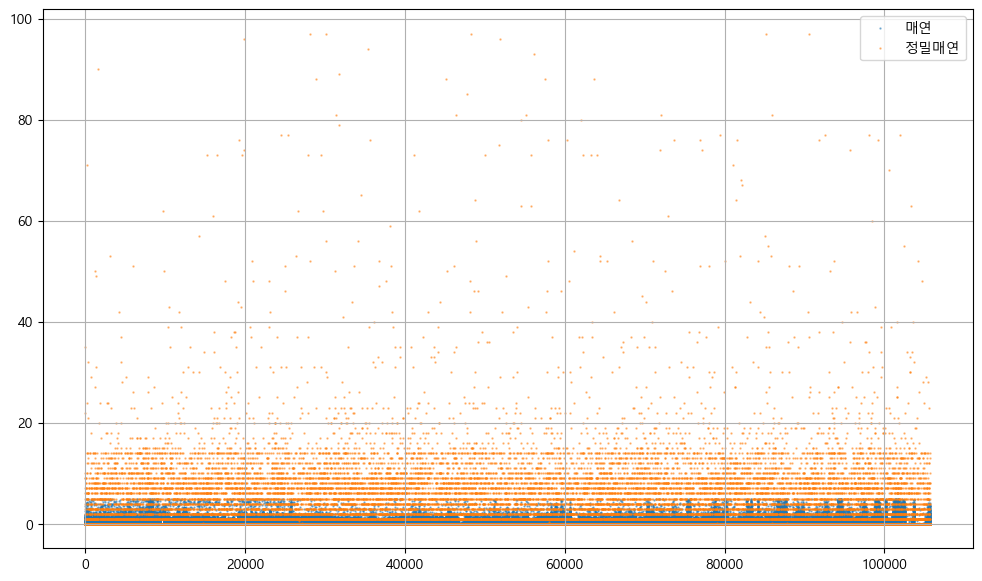

In [236]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['매연'], s=.5, alpha=.5, label='매연')
plt.scatter(die.index, die['무부하매연측정치1'], s=.5, alpha=.5, label='정밀매연')
plt.legend();

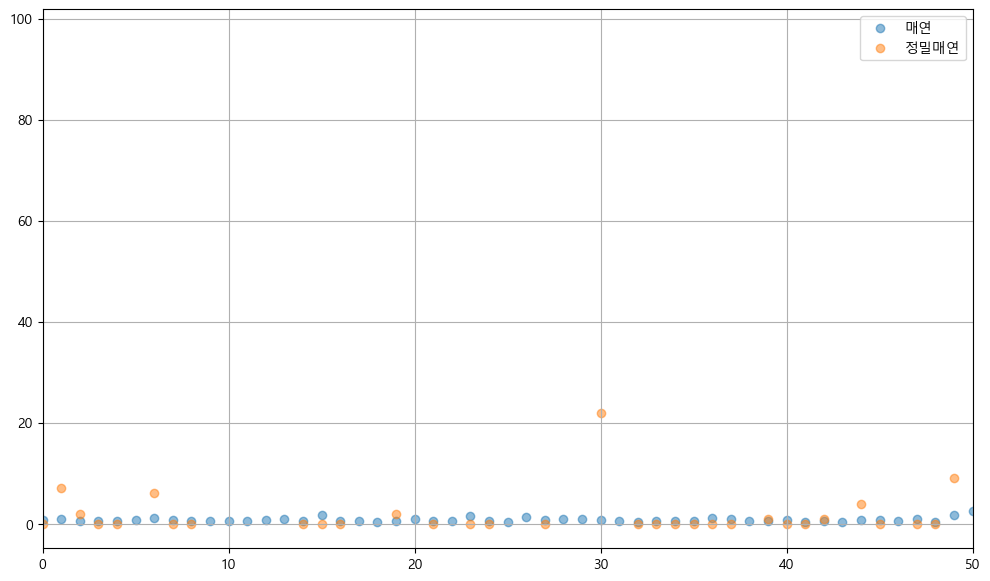

In [237]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['매연'], alpha=.5, label='매연')
plt.scatter(die.index, die['무부하매연측정치1'], alpha=.5, label='정밀매연')
plt.xlim([0, 50])
plt.legend();

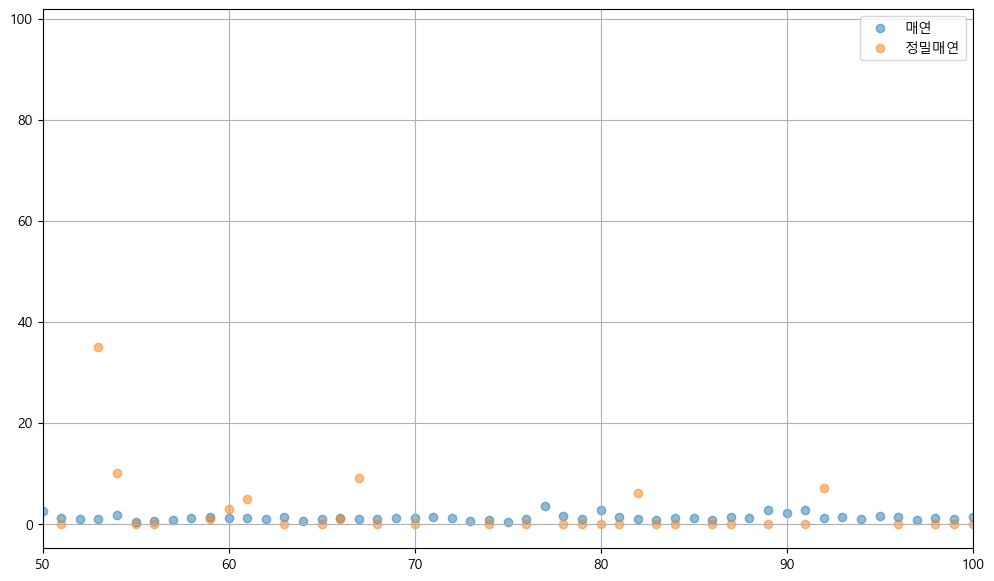

In [238]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['매연'], alpha=.5, label='매연')
plt.scatter(die.index, die['무부하매연측정치1'], alpha=.5, label='정밀매연')
plt.xlim([50, 100])
plt.legend();

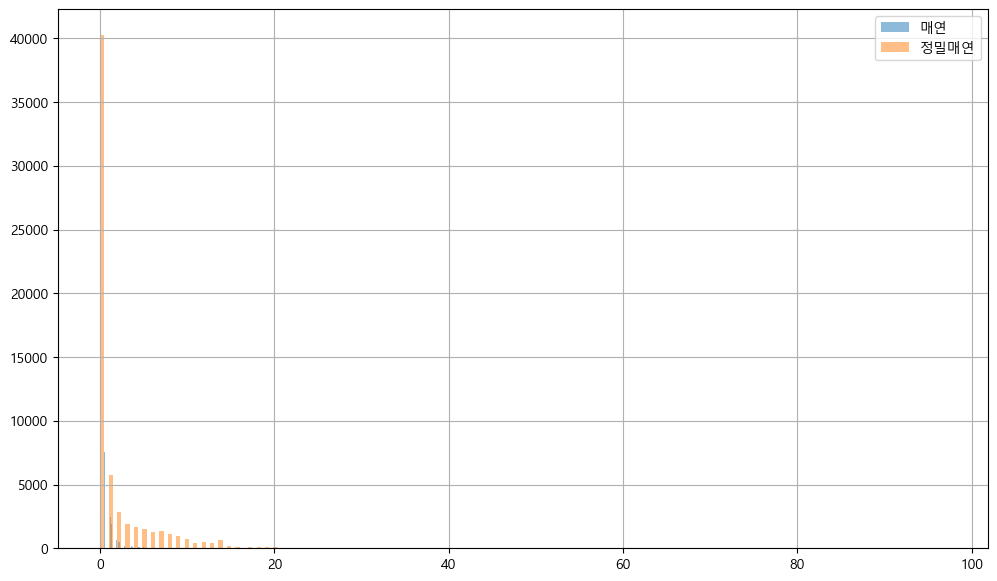

In [239]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.hist(die['매연'], alpha=.5, label='매연', bins=200)
plt.hist(die['무부하매연측정치1'], alpha=.5, label='정밀매연', bins=200)
plt.legend();

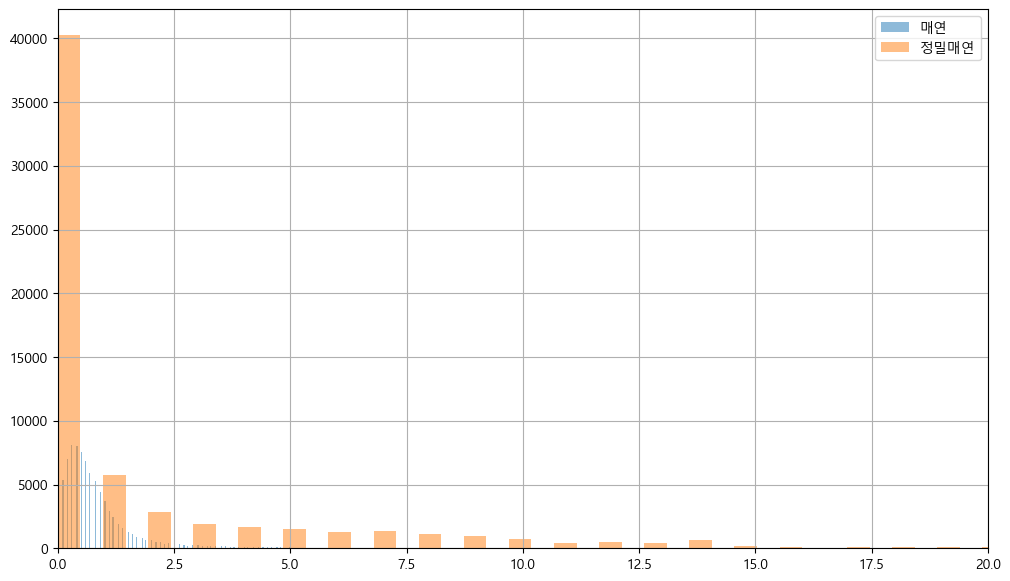

In [240]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.hist(die['매연'], alpha=.5, label='매연', bins=200)
plt.hist(die['무부하매연측정치1'], alpha=.5, label='정밀매연', bins=200)
plt.xlim([0, 20])
plt.legend();

### [❌] 25\. 종합검사의 매연측정결과 부적합비율
- 20 ~ 22번 한번에 처리

### [❌] (차후) 26\. 종합검사의 매연측정값 vs 매연RSD 매연값
- Q. 1대1 비교?

### 종합검사 매연 부적합 경유차 vs 매연RSD 매연값 비교

### [❌] (차후) 27\. 종합검사 매연농도 vs 매연RSD 매연농도 1:1비교

## 28\. 시험일 후 최초검사 부적합 - 매연RSD 값
- 최초 정밀검사 부적합 차량의 매연RSD 값 확인하여 오류-적합, 오류-부적합 확인
- 과정
    - 1. 유효데이터(매연제한 없음) 중 경유차 추출
    - 2. 운행차 정밀검사 기준으로 매연RSD 판정 부적합 데이터 추출
    - 3. 검사일자(정밀검사) - 검사날짜(원격측정) = 검사날짜차이
    - 4. '검사날짜차이' > 0 인 샘플 추출
    - 5. '검사날짜차이' 오름차순, 자동차등록번호 중복 제거
    - 6. 정밀검사 '무부하매연판정1' 비율

In [241]:
rcse.shape

(398673, 48)

In [242]:
rcse.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [243]:
# 1. 경유차(매연제한 없음) 중 유효데이터 추출
# vdfRecordStatus = N, vdfValid = V, samFlag = V, 차량번호 : nan, 오류 값(********) 제외, 경유
sdie = rcse[(rcse['기록상태'] == 'N') & (rcse['유효'] == 'V') & (rcse['플래그'] == 'V') & (rcse['차량번호'] != '********') & (rcse['차량번호'].isnull() == False) & (rcse['연료'] == '경유')].reset_index(drop=True)
sdie.shape

(108115, 48)

In [244]:
sdie['연료'].unique()

array(['경유'], dtype=object)

In [245]:
# 2. 운행차 정밀검사 기준으로 매연RSD 판정 부적합 데이터 추출
sdf28 = sdie[sdie['매연'] > sdie['무부하매연허용치1']].reset_index(drop=True)
sdf28.shape

(397, 48)

### [출력] RSD 부적합 데이터

In [246]:
# sdf28.to_excel(os.path.join(an_fold, 'RSD부적합_경유.xlsx'), index=False)

In [247]:
sdf28[['정밀검사일자', '측정날짜']].dtypes

정밀검사일자    object
측정날짜      object
dtype: object

In [248]:
sdf28['정밀검사일자'] = pd.to_datetime(sdf28['정밀검사일자'])
sdf28['측정날짜'] = pd.to_datetime(sdf28['측정날짜'])
sdf28[['정밀검사일자', '측정날짜']].dtypes

정밀검사일자    datetime64[ns]
측정날짜      datetime64[ns]
dtype: object

In [249]:
# 3. 정밀검사일자(정밀검사) - 측정날짜(원격측정) = 검사날짜차이
sdf28['검사날짜차이'] = sdf28['정밀검사일자'] - sdf28['측정날짜']
sdf28['검사날짜차이'] = sdf28['검사날짜차이'].astype('str')
sdf28['검사날짜차이'] = sdf28['검사날짜차이'].str.split(' ').str[0]
sdf28['검사날짜차이'] = pd.to_numeric(sdf28['검사날짜차이'], errors='coerce')

In [250]:
# 4. '검사날짜차이' > 0 인 샘플 추출
sdf28 = sdf28[sdf28['검사날짜차이'] > 0].reset_index(drop=True)
sdf28.shape

(163, 49)

In [251]:
# 5. '검사날짜차이' 오름차순
sdf28a = sdf28.sort_values('검사날짜차이').drop_duplicates('차량번호').reset_index(drop=True)
sdf28a.shape

(159, 49)

In [252]:
sdf28a[['정밀검사일자', '측정날짜', '검사날짜차이']].head()

,정밀검사일자,측정날짜,검사날짜차이
0,2023-08-25,2023-08-23,2
1,2023-04-06,2023-04-04,2
2,2023-01-05,2023-01-03,2
3,2023-07-29,2023-07-26,3
4,2023-07-31,2023-07-26,5


In [253]:
# 6. 정밀검사 '무부하매연판정1' 비율
grp28 = sdf28a['무부하매연판정1'].value_counts(dropna=False, normalize=True).reset_index()
grp28 = grp28.rename(columns={'index':'매연판정', '무부하매연판정1':'판정비율'})
grp28['판정비율'] = grp28['판정비율'].round(2)
grp28.loc[grp28.shape[0]] = ['총합', round(grp28['판정비율'].sum(), 2)]
grp28

,매연판정,판정비율
0,Y,1.00
1,총합,1.00


## 29\. 시험일 후 최종검사 부적합 - 매연RSD값
- 과정
    - 1. 유효데이터(매연제한 없음) 중 경유차 추출
    - 2. 운행차 정밀검사 기준으로 매연RSD 판정 부적합 데이터 추출
    - 3. 검사일자(정밀검사) - 검사날짜(원격측정) = 검사날짜차이
    - 4. '검사날짜차이' > 0 인 샘플 추출
    - 5. '검사날짜차이' 내림차순, 자동차등록번호 중복 제거
    - 6. 정밀검사 '무부하매연판정1' 비율

In [254]:
# 1 ~ 4. 동일 과정
# 5. '검사날짜차이' 내림차순
sdf29 = sdf28.sort_values('검사날짜차이', ascending=False).drop_duplicates('차량번호').reset_index(drop=True)
sdf29.shape

(159, 49)

In [255]:
sdf29[['정밀검사일자', '측정날짜', '검사날짜차이']].head()

,정밀검사일자,측정날짜,검사날짜차이
0,2023-09-07,2022-10-18,324
1,2023-09-06,2022-10-24,317
2,2023-08-21,2022-10-24,301
3,2023-08-12,2022-10-18,298
4,2023-08-25,2022-11-21,277


In [256]:
# 6. 정밀검사 '무부하매연판정1' 비율
grp29 = sdf29['무부하매연판정1'].value_counts(dropna=False, normalize=True).reset_index()
grp29 = grp29.rename(columns={'index':'매연판정', '무부하매연판정1':'판정비율'})
grp29['판정비율'] = grp29['판정비율'].round(2)
grp29.loc[grp29.shape[0]] = ['총합', round(grp29['판정비율'].sum(), 2)]
grp29

,매연판정,판정비율
0,Y,1.00
1,총합,1.00


## 종합검사 NOx 부적합 경유차 vs 매연RSD 매연값 비교

### [❌] (차후) 30\. 종합검사 NOx vs 매연RSD 매연농도 1:1비교

## 고정식 다차선 매연 원격측정기 유효 측정수량 검토

### [❌] (보류) 31\. 일자별 유효 측정수량
- 1. 전체 통과 차량 건수 : UFM 사진파일 수 기록
- 2. 다차선 매연RSD측정 건수 : 해당일 매연RSD측정 유효데이터 건수
- 3. 유효율 : b번 / a번 *100(%)

## 결과 출력

In [257]:
today_date = dt.datetime.today().strftime("%Y%m%d")
today_date

'20231020'

In [258]:
with pd.ExcelWriter(os.path.join(an_fold, f'매연RSD측정결과_분석(제공차량제원)({today_date}).xlsx')) as writer:
    grp1.to_excel(writer, sheet_name='1_연료별', index=False)
    grp2.to_excel(writer, sheet_name='2_경유_차종별', index=False)
    grp3.to_excel(writer, sheet_name='3_경유_연식별', index=False)
    grp4.to_excel(writer, sheet_name='4_경유_차선별', index=False)
    grp5.to_excel(writer, sheet_name='5_경유_속도별', index=False)
    grp6.to_excel(writer, sheet_name='6_경유_배출가스등급별', index=False)
    grp7.to_excel(writer, sheet_name='7_경유_배기량별', index=False)
    grp8.to_excel(writer, sheet_name='8_경유_차량중량별', index=False)
    grp9.to_excel(writer, sheet_name='9_경유_매연허용기준별', index=False)
    grp10.to_excel(writer, sheet_name='10_경유_NOx허용기준별', index=False)

    grp11.to_excel(writer, sheet_name='11_농도별', index=False)
    grp12.to_excel(writer, sheet_name='12_농도_차종별', index=True)
    grp13.to_excel(writer, sheet_name='13_농도_연식별', index=True)
    grp14.to_excel(writer, sheet_name='14_농도_측정속도별', index=True)
    grp15.to_excel(writer, sheet_name='15_농도_배출가스등급별', index=True)
    grp16.to_excel(writer, sheet_name='16_농도_배기량별', index=True)
    grp17.to_excel(writer, sheet_name='17_농도_차량중량별', index=True)
    grp18.to_excel(writer, sheet_name='18_농도_매연허용기준별', index=True)
    grp19.to_excel(writer, sheet_name='19_농도_NOx허용기준별', index=True)

    grp20.to_excel(writer, sheet_name='20_매연_적합_부적합비율(상위10%)', index=False)
    grp21.to_excel(writer, sheet_name='21_매연_적합_부적합비율(하위90%)', index=False)
    grp22.to_excel(writer, sheet_name='22_매연_적합_부적합비율(하위10%)', index=False)
    grp23.to_excel(writer, sheet_name='23_엔진형식별_매연_정밀매연', index=False)
    # grp24.to_excel(writer, sheet_name='24_매연_정밀매연_비교', index=False) # 시각화방법 고민
    # grp25.to_excel(writer, sheet_name='25_매연_적합_부적합비율', index=False) # 20 ~ 22번 한번에 처리
    # grp26.to_excel(writer, sheet_name='26_매연측정값과_매연RSD비교', index=False) # 차후 논의

    # grp27.to_excel(writer, sheet_name='27_매연농도와_매연RSD_1대1비교', index=False) # 차후 논의
    
    grp28.to_excel(writer, sheet_name='28_시험일후_최초검사_부적합', index=False) # 문의 필요
    grp29.to_excel(writer, sheet_name='29_시험일후_최종검사_부적합', index=False) # 문의 필요

    # grp30.to_excel(writer, sheet_name='30_종합검사NOx와_RSD매연_1대1비교', index=False) # 차후 논의

    # grp31.to_excel(writer, sheet_name='31_일자별_유효_측정수량', index=False) # 보류

In [259]:
sec = time.time() - start_time
print(str(dt.timedelta(seconds=sec)).split('.')[0])

0:00:20


# End